In [1]:
# pip install scikit-optimize

## pip install above if necessary

## This project was conducted by Deniz Sagmanli (ID: 20539984) , Muhammad Hassan Rizvi (ID: 20591691) and Sundeep Veluchamy (ID: 20578133)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
 pd.options.mode.copy_on_write = True 

## Deniz Sagmanli (20539984): Importing the data, Splitting the data into cities and removing 53rd week from the data

In [4]:
df1 = pd.read_csv('dengue_features_train.csv')
df_labels = pd.read_csv('dengue_labels_train.csv')
df = pd.concat([df1, df_labels['total_cases']], axis=1)
#turning weekofyear = 53 to 1
df['weekofyear'] = df['weekofyear'].apply(lambda x: 1 if x==53 else x)
#df.drop(['reanalysis_specific_humidity_g_per_kg','reanalysis_sat_precip_amt_mm', 'week_start_date'],axis=1,inplace=True)
df.drop('week_start_date', axis=1, inplace=True)

In [5]:
#Splitting to two datasets for each city
iq = df[df['city'] == 'iq']
#iq.drop(['index'],axis=1,inplace=True)## Why do we drop the index?
sj = df[df['city'] == 'sj']
#sj.drop(['index'],axis=1,inplace=True)## Why do we drop the index?

## Deniz: Data Imputation via moving averages and data cleaning

In [6]:
# Function to find maximum consecutive NaN values in a column for moving average imputation
def max_consecutive_nan(column):
    max_consecutive = 0
    current_consecutive = 0

    for value in column:
        if pd.isna(value):
            current_consecutive += 1
            max_consecutive = max(max_consecutive, current_consecutive)
        else:
            current_consecutive = 0

    return max_consecutive

#max_consecutive_nan(iq['reanalysis_sat_precip_amt_mm'])

In [7]:
# imputing moving average for sj
def impute_nan_with_moving_average(column, window_size):
    return column.fillna(column.rolling(window=window_size, min_periods=1).mean())

sj['ndvi_ne'] = impute_nan_with_moving_average(sj['ndvi_ne'], 16)
sj['ndvi_nw'] = impute_nan_with_moving_average(sj['ndvi_nw'], 16)
sj['ndvi_se'] = impute_nan_with_moving_average(sj['ndvi_se'], 15)
sj['ndvi_sw'] = impute_nan_with_moving_average(sj['ndvi_sw'], 15)
sj['reanalysis_air_temp_k'] = impute_nan_with_moving_average(sj['reanalysis_air_temp_k'], 2)
sj['reanalysis_avg_temp_k'] = impute_nan_with_moving_average(sj['reanalysis_avg_temp_k'], 2)
sj['reanalysis_dew_point_temp_k'] = impute_nan_with_moving_average(sj['reanalysis_dew_point_temp_k'], 2)
sj['reanalysis_max_air_temp_k'] = impute_nan_with_moving_average(sj['reanalysis_max_air_temp_k'], 2)
sj['reanalysis_min_air_temp_k'] = impute_nan_with_moving_average(sj['reanalysis_min_air_temp_k'], 2)
sj['reanalysis_precip_amt_kg_per_m2'] = impute_nan_with_moving_average(sj['reanalysis_precip_amt_kg_per_m2'], 2)
sj['reanalysis_relative_humidity_percent'] = impute_nan_with_moving_average(sj['reanalysis_relative_humidity_percent'], 2)
sj['reanalysis_tdtr_k'] = impute_nan_with_moving_average(sj['reanalysis_tdtr_k'], 2)
sj['precipitation_amt_mm'] = impute_nan_with_moving_average(sj['precipitation_amt_mm'], 4)
sj['station_avg_temp_c'] = impute_nan_with_moving_average(sj['station_avg_temp_c'], 2)
sj['station_diur_temp_rng_c'] = impute_nan_with_moving_average(sj['station_diur_temp_rng_c'], 2)
sj['station_max_temp_c'] = impute_nan_with_moving_average(sj['station_max_temp_c'], 2)
sj['station_min_temp_c'] = impute_nan_with_moving_average(sj['station_min_temp_c'], 2)
sj['station_precip_mm'] = impute_nan_with_moving_average(sj['station_precip_mm'], 2)

sj['reanalysis_specific_humidity_g_per_kg'] = impute_nan_with_moving_average(sj['reanalysis_specific_humidity_g_per_kg'], 2)
sj['reanalysis_sat_precip_amt_mm'] = impute_nan_with_moving_average(sj['reanalysis_sat_precip_amt_mm'], 4)

In [8]:
# imputing moving average for iq
iq['ndvi_ne'] = impute_nan_with_moving_average(iq['ndvi_ne'], 2)
iq['ndvi_nw'] = impute_nan_with_moving_average(iq['ndvi_nw'], 2)
iq['ndvi_se'] = impute_nan_with_moving_average(iq['ndvi_se'], 2)
iq['ndvi_sw'] = impute_nan_with_moving_average(iq['ndvi_sw'], 2)
iq['reanalysis_air_temp_k'] = impute_nan_with_moving_average(iq['reanalysis_air_temp_k'], 2)
iq['reanalysis_avg_temp_k'] = impute_nan_with_moving_average(iq['reanalysis_avg_temp_k'], 2)
iq['reanalysis_dew_point_temp_k'] = impute_nan_with_moving_average(iq['reanalysis_dew_point_temp_k'], 2)
iq['reanalysis_max_air_temp_k'] = impute_nan_with_moving_average(iq['reanalysis_max_air_temp_k'], 2)
iq['reanalysis_min_air_temp_k'] = impute_nan_with_moving_average(iq['reanalysis_min_air_temp_k'], 2)
iq['reanalysis_precip_amt_kg_per_m2'] = impute_nan_with_moving_average(iq['reanalysis_precip_amt_kg_per_m2'], 2)
iq['reanalysis_relative_humidity_percent'] = impute_nan_with_moving_average(iq['reanalysis_relative_humidity_percent'], 2)
iq['reanalysis_tdtr_k'] = impute_nan_with_moving_average(iq['reanalysis_tdtr_k'], 2)
iq['precipitation_amt_mm'] = impute_nan_with_moving_average(iq['precipitation_amt_mm'], 2)
iq['station_avg_temp_c'] = impute_nan_with_moving_average(iq['station_avg_temp_c'], 7)
iq['station_diur_temp_rng_c'] = impute_nan_with_moving_average(iq['station_diur_temp_rng_c'], 7)
iq['station_max_temp_c'] = impute_nan_with_moving_average(iq['station_max_temp_c'], 7)
iq['station_min_temp_c'] = impute_nan_with_moving_average(iq['station_min_temp_c'], 2)
iq['station_precip_mm'] = impute_nan_with_moving_average(iq['station_precip_mm'], 3)

iq['reanalysis_specific_humidity_g_per_kg'] = impute_nan_with_moving_average(iq['reanalysis_specific_humidity_g_per_kg'], 2)
iq['reanalysis_sat_precip_amt_mm'] = impute_nan_with_moving_average(iq['reanalysis_sat_precip_amt_mm'], 2)

In [9]:
#turning all kelvin values to celsius
k_columns = ['reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_tdtr_k']
#df[k_columns] = df[k_columns].apply(lambda x: x.apply(lambda y: y-273.15))
sj[k_columns] = sj[k_columns].apply(lambda x: x.apply(lambda y: y-273.15))
iq[k_columns] = iq[k_columns].apply(lambda x: x.apply(lambda y: y-273.15))

In [10]:
# sj = sj.copy()
# iq = iq.copy()
cleaned_sj = sj
cleaned_iq = iq


<Axes: >

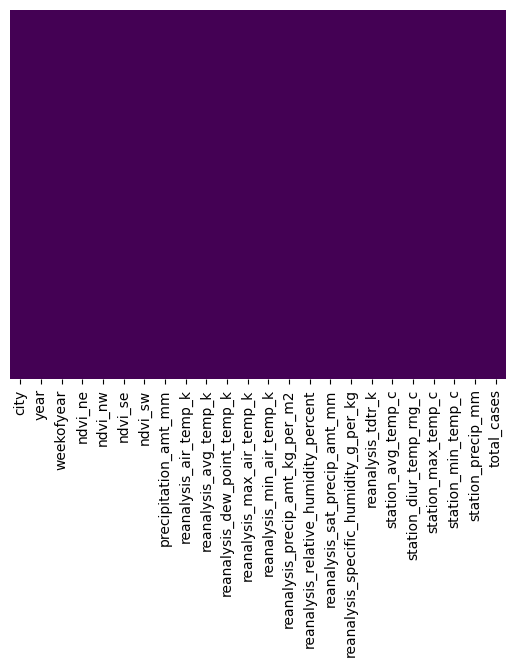

In [11]:
sns.heatmap(iq.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Sundeep Veluchamy (20578133): Decomposing weekofyear to account for seasonality and Scaling the required features using RobustScaler()

In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:



sj['sin_weekofyear'] = np.sin(2 * np.pi * sj['weekofyear'] / 52).copy()
sj['cos_weekofyear'] = np.cos(2 * np.pi * sj['weekofyear'] / 52).copy()

iq['sin_weekofyear'] = np.sin(2 * np.pi * iq['weekofyear'] / 52).copy()
iq['cos_weekofyear'] = np.cos(2 * np.pi * iq['weekofyear'] / 52).copy()

sj.drop(['cos_weekofyear'], axis=1, inplace=True)
iq.drop(['cos_weekofyear'], axis=1, inplace=True)

cleaned_sj = sj.copy()
cleaned_iq = iq.copy()

features_to_scale = [col for col in sj.columns if col not in ['year', 'sin_weekofyear', 'cos_weekofyear','total_cases','city', 'weekofyear','index']]

scaler = RobustScaler()
# data_scaled = data.copy()  # Make a copy of the dataset
sj[features_to_scale] = scaler.fit_transform(sj[features_to_scale])
iq[features_to_scale] = scaler.fit_transform(iq[features_to_scale])



## Deniz: To Concatenate sj and iq for Feature Importance Analysis

In [14]:
df2 = pd.concat([sj, iq], ignore_index=True).copy()### IMP tried changing this so the code could work when we reintegrate weekofyear

In [15]:
sj.tail()

city  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
931   sj  2008          13  0.197731 -1.111253  1.859318  1.782682   
932   sj  2008          14 -0.953382 -0.876178 -0.804693 -1.373149   
933   sj  2008          15 -2.117910 -1.242208 -0.548389 -0.345788   
934   sj  2008          16 -0.557920 -1.514795  0.373670  0.596451   
935   sj  2008          17 -0.943446 -0.810276 -1.390986 -1.040895   

     precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  ...  \
931              0.123070              -1.181047              -1.257885  ...   
932             -0.325276              -0.601401              -0.597403  ...   
933             -0.073189              -0.922198              -0.942486  ...   
934             -0.398561              -0.834440              -0.831169  ...   
935             -0.398561              -0.296091              -0.356215  ...   

     reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
931                      0.123070                              -1.217498   
932                     -0.325276                              -0.828836   
933                     -0.073189                              -1.011447   
934                     -0.398561                              -1.135732   
935                     -0.398561                              -0.443990   

     reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
931           0.677966           -0.931087                -0.894737   
932           0.406780           -0.416539                 0.052632   
933          -0.429379           -0.949464                -0.960526   
934           0.519774           -0.814701                -0.473684   
935           2.372881           -0.073507                 0.697368   

     station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  \
931           -0.772727           -0.772727          -0.556629            4   
932           -0.500000           -0.272727          -0.602283            3   
933           -1.045455           -0.500000           0.458297            1   
934           -1.045455           -0.500000          -0.226514            3   
935            0.000000            0.227273          -0.609306            5   

     sin_weekofyear  
931        1.000000  
932        0.992709  
933        0.970942  
934        0.935016  
935        0.885456  

[5 rows x 25 columns]

## Sundeep: Feature Importance by linear Lasso Regression both cities

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler



X = df2.drop(['city','total_cases','weekofyear'], axis=1)  # Features we only need sin_weekofyear
y = df2['total_cases']  # Target variable


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LassoCV


lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,  0.6, 0.7, 0.8, 1, 10],max_iter =1000000, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)
print(f"Optimal alpha: {lasso_cv.alpha_}")

Optimal alpha: 0.7


In [19]:
from sklearn.linear_model import Lasso
# Fit the Lasso regression model
# Note: alpha is the regularization strength
model = Lasso(alpha=0.7, max_iter = 100000, random_state=42)
model.fit(X_train, y_train)

# Creating a DataFrame with feature names and coefficients
coefficients_df = pd.DataFrame({
    'Feature Name': X.columns,
    'Coefficient': model.coef_
})

# Absolute values of the coefficients
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()

# Sort the DataFrame by the 'Absolute Coefficient' column in descending order
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False).reset_index(drop=True)

coefficients_df

Feature Name  Coefficient  Absolute Coefficient
0                          sin_weekofyear   -10.952785             10.952785
1   reanalysis_specific_humidity_g_per_kg     6.060097              6.060097
2                                    year    -2.302270              2.302270
3                                 ndvi_ne    -1.694585              1.694585
4                                 ndvi_nw    -0.664662              0.664662
5         reanalysis_precip_amt_kg_per_m2     0.618205              0.618205
6                                 ndvi_se    -0.137520              0.137520
7                   reanalysis_avg_temp_k    -0.000000              0.000000
8             reanalysis_dew_point_temp_k     0.000000              0.000000
9               reanalysis_max_air_temp_k    -0.000000              0.000000
10              reanalysis_min_air_temp_k     0.000000              0.000000
11                  reanalysis_air_temp_k    -0.000000              0.000000
12                                ndvi_sw    -0.000000              0.000000
13           reanalysis_sat_precip_amt_mm     0.000000              0.000000
14                   precipitation_amt_mm     0.000000              0.000000
15                      reanalysis_tdtr_k    -0.000000              0.000000
16                     station_avg_temp_c    -0.000000              0.000000
17                station_diur_temp_rng_c    -0.000000              0.000000
18                     station_max_temp_c     0.000000              0.000000
19                     station_min_temp_c     0.000000              0.000000
20                      station_precip_mm     0.000000              0.000000
21   reanalysis_relative_humidity_percent     0.000000              0.000000


We use a factorial design with 6 and 10 features. Since only 7 are non-zero we incorportate 3 other features using domain knowledge. They are written below

reanalysis_relative_humidity_percent: This feature measures the relative humidity, which can significantly influence mosquito breeding habitats and the transmission dynamics of dengue virus. Although it has a coefficient of 0 in your current analysis, humidity is a crucial environmental factor that may exhibit non-linear relationships with dengue cases.

reanalysis_sat_precip_amt_mm: Precipitation amount in millimeters represents the total amount of rainfall, which is closely linked to mosquito breeding and dengue transmission. Despite having a coefficient of 0 in the current analysis, rainfall patterns can have a significant impact on the occurrence of dengue cases.

station_avg_temp_c: This feature denotes the average temperature recorded at weather stations, which can affect mosquito survival rates, virus replication rates, and mosquito biting rates. While it has a coefficient of 0 in your current analysis, temperature is a well-known environmental factor influencing dengue transmission.s.

## Sundeep: Feature Selection ##

In [20]:
from sklearn.model_selection import train_test_split

#Based on importance analysis
features = ['sin_weekofyear', 'reanalysis_specific_humidity_g_per_kg', 'year', 'ndvi_ne', 'ndvi_nw', 'reanalysis_precip_amt_kg_per_m2']


sj_X_train = cleaned_sj[features].copy()
sj_y_train = cleaned_sj['total_cases'].copy()

iq_X_train = cleaned_iq[features].copy()
iq_y_train = cleaned_iq['total_cases'].copy()



## Sundeep: Functions to help calculate best params and aggregatePerformanceMetrics

In [21]:
import numpy as np
from scipy import stats
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer


In [22]:
def City_X_train(city):
    if city == 'sj':
        return sj_X_train
    else:
        return iq_X_train

In [23]:
def City_y_train(city):
    if city == 'sj':
        return sj_y_train
    else:
        return iq_y_train

In [24]:
def City(city):
    if city == 'sj':
        return sj
    else:
        return iq

In [25]:
from sklearn.compose import ColumnTransformer

In [26]:
features_to_scale = list(set(features) & set(features_to_scale))

In [27]:
def scoresAndBestParams(city, model_name, param_space, scoring):
    # Define the model based on input
    if model_name == 'SVR':
        model = SVR()
    elif model_name == 'LinearRegression':
        model = LinearRegression()
    elif model_name == 'RandomForest':
        model = RandomForestRegressor()
    elif model_name == 'Lasso':
        model = Lasso()
    else:
        raise ValueError("Unsupported model type")

    # Column transformer for preprocessing
    preprocessing_steps = ColumnTransformer([
        ('scaler', RobustScaler(), features_to_scale)
    ], remainder='passthrough')

    # Build the pipeline with the selected model
    pipeline = Pipeline([
        ('preprocessor', preprocessing_steps),
        (model_name.lower(), model)
    ])
    
    # Setup for BayesSearchCV
    inner_cv = TimeSeriesSplit(n_splits=5)
    bayes_search = BayesSearchCV(
        estimator=pipeline,
        search_spaces=param_space,
        n_iter=30,
        cv=inner_cv,
        scoring=scoring,
        verbose=2,
        n_jobs=-1
    )
    
    outer_cv = TimeSeriesSplit(n_splits=5)
    outer_scores = []
    outer_MAE, outer_MSE, outer_RMSE, outer_R2 = [], [], [], []
    best_params_list = []

    for train_idx, test_idx in outer_cv.split(City_X_train(city)):
        X_train_fold, X_test_fold = City_X_train(city).iloc[train_idx], City_X_train(city).iloc[test_idx]
        y_train_fold, y_test_fold = City_y_train(city).iloc[train_idx], City_y_train(city).iloc[test_idx]

        
        bayes_search.fit(X_train_fold, y_train_fold)
        best_params_list.append(bayes_search.best_params_)
        best_model = bayes_search.best_estimator_
        y_pred = best_model.predict(X_test_fold)

        
        mae = mean_absolute_error(y_test_fold, y_pred)
        mse = mean_squared_error(y_test_fold, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test_fold, y_pred)
        
        outer_MAE.append(mae)
        outer_MSE.append(mse)
        outer_RMSE.append(rmse)
        outer_R2.append(r2)

    print(f"Average MAE: {np.mean(outer_MAE)}, Average MSE: {np.mean(outer_MSE)}, Average RMSE: {np.mean(outer_RMSE)}, Average R^2: {np.mean(outer_R2)}")
    print("\nBest parameters from each outer fold:")
    for idx, params in enumerate(best_params_list, 1):
        print(f"Fold {idx}: {params}")

In [28]:
def aggregatePerformanceMetrics(city, model_name, param_space, scoring):
    if model_name == 'SVR':
        model = SVR()
    elif model_name == 'LinearRegression':
        model = LinearRegression()
    elif model_name == 'RandomForest':
        model = RandomForestRegressor()
    elif model_name == 'Lasso':
        model = Lasso()
    else:
        raise ValueError("Unsupported model type")

    # Preprocessing steps for the pipeline
    preprocessing_steps = ColumnTransformer([
        ('scaler', RobustScaler(), features_to_scale)
    ], remainder='passthrough')


    pipeline = Pipeline([
        ('preprocessor', preprocessing_steps),
        (model_name.lower(), model)  
    ])

    # Parameter space definition (provided in the argument)
    param_space = param_space

    # Setup for multiple repetitions of nested CV
    n_repetitions = 10
    final_MAE, final_MSE, final_RMSE, final_R2 = [], [], [], []

    for repetition in range(n_repetitions):
        outer_cv = TimeSeriesSplit(n_splits=5)
        outer_MAE, outer_MSE, outer_RMSE, outer_R2 = [], [], [], []

        for train_idx, test_idx in outer_cv.split(City_X_train(city)):
            X_train_fold, X_test_fold = City_X_train(city).iloc[train_idx], City_X_train(city).iloc[test_idx]
            y_train_fold, y_test_fold = City_y_train(city).iloc[train_idx], City_y_train(city).iloc[test_idx]

            inner_cv = TimeSeriesSplit(n_splits=5)
            bayes_search = BayesSearchCV(
                estimator=pipeline,
                search_spaces=param_space,
                n_iter=30,
                cv=inner_cv,
                scoring=scoring,
                random_state=repetition,
                verbose=2,
                n_jobs=-1
            )

            bayes_search.fit(X_train_fold, y_train_fold)
            best_model = bayes_search.best_estimator_
            predictions = best_model.predict(X_test_fold)

            outer_MAE.append(mean_absolute_error(y_test_fold, predictions))
            outer_MSE.append(mean_squared_error(y_test_fold, predictions))
            outer_RMSE.append(mean_squared_error(y_test_fold, predictions, squared=False))
            outer_R2.append(r2_score(y_test_fold, predictions))

        final_MAE.append(np.mean(outer_MAE))
        final_MSE.append(np.mean(outer_MSE))
        final_RMSE.append(np.mean(outer_RMSE))
        final_R2.append(np.mean(outer_R2))

    # Print the mean and 95% CI for each performance metric
    def mean_confidence_interval(data):
        confidence = 0.95
        n = len(data)
        m, se = np.mean(data), stats.sem(data)
        h = se * stats.t.ppf((1 + confidence) / 2., n-1)
        return m, m-h, m+h

    for metric_name, metric_values in zip(['MAE', 'MSE', 'RMSE', 'R^2'], [final_MAE, final_MSE, final_RMSE, final_R2]):
        mean, lower, upper = mean_confidence_interval(metric_values)
        print(f"{metric_name}: Mean = {mean:.4f}, 95% CI = [{lower:.4f}, {upper:.4f}]")


## Sundeep: Functions for the plots

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from skopt import BayesSearchCV


In [30]:
def getPlotSet(city, split_position):
    ##Split position is from 1 to 5
    outer_cv = TimeSeriesSplit(n_splits=5)
    plot_X_test, plot_y_test = None, None  
    i=1
    for train_idx, test_idx in outer_cv.split(City_X_train(city)):
        X_train_fold, X_test_fold = City_X_train(city).iloc[train_idx], City_X_train(city).iloc[test_idx]
        y_train_fold, y_test_fold = City_y_train(city).iloc[train_idx], City_y_train(city).iloc[test_idx]

        if i == split_position:
            plot_X_test, plot_y_test = X_test_fold, y_test_fold
            return (plot_X_test,plot_y_test)
        i+=1
    return
    

In [31]:
def get_6feature_model(city, model_name, param_space, scoring, split_position = None):

    model_mapping = {
        'SVR': SVR(),
        'LinearRegression': LinearRegression(),
        'RandomForest': RandomForestRegressor(),
        'Lasso': Lasso()
    }
    model = model_mapping.get(model_name)
    if model is None:
        raise ValueError("Unsupported model type")

    # Preprocessing steps for the pipeline
    preprocessing_steps = ColumnTransformer([
        ('scaler', RobustScaler(), features_to_scale)
    ], remainder='passthrough')

    # Pipeline setup with dynamic model insertion
    pipeline = Pipeline([
        ('preprocessor', preprocessing_steps),
        (model_name.lower(), model)  # Dynamically add the selected model
    ])
    
    inner_cv = TimeSeriesSplit(n_splits=5)
    bayes_search = BayesSearchCV(
        estimator=pipeline,
        search_spaces=param_space,
        n_iter=30,
        cv=inner_cv,
        scoring=scoring,
        random_state=101,
        verbose=2,
        n_jobs=-1
    )
    if split_position is None:
        X_train_fold= City_X_train(city)
        bayes_search.fit(X_train_fold, City(city)['total_cases'])
        best_model = bayes_search.best_estimator_
        return best_model
        
    X_train_fold, y_train_fold = getPlotSet(city, split_position)
    bayes_search.fit(X_train_fold, y_train_fold)
    best_model = bayes_search.best_estimator_
    return best_model
    

In [75]:
six_feature_MAE_SJ_model_list = []

# Parameter spaces arrived from previous analysis throught the trials below (after the plots)

param_space_rf = {
    'randomforest__n_estimators': Integer(50, 300),  
    'randomforest__max_depth': Integer(5, 35), 
    'randomforest__min_samples_split': Integer(2, 40), 
    'randomforest__min_samples_leaf': Integer(1, 25),  
    'randomforest__max_features': Real(0.05, 0.15) 
}
param_space_svr = {
    'svr__kernel': Categorical(['linear', 'sigmoid']),  
    'svr__C': Real(0.01, 1, prior='log-uniform'),  
    'svr__gamma': Real(0.0001, 0.1, prior='log-uniform'),  
    'svr__coef0': Categorical([-1.0, 1.0]), 
    'svr__epsilon': Real(0.1, 1.0, prior='uniform')  
}
param_space_lasso = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring = 'neg_mean_absolute_error'
six_feature_MAE_SJ_model_list = []
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'RandomForest', param_space_rf, scoring,split_position = 5))
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'SVR', param_space_svr, scoring,split_position = 5 ))
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'Lasso', param_space_lasso, scoring, split_position = 5 ))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Sundeep: Scatter Plots

## Comparing the Perfomrances of the 3 Regressions on the Model with 6 features and MAE Scoring Metric for the city of San Juan

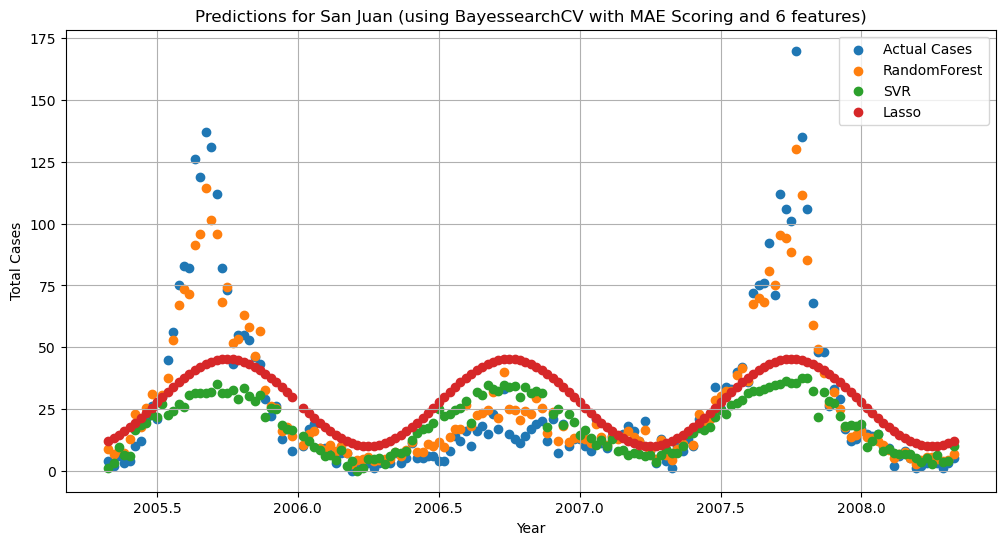

In [76]:
plot_X_test , plot_y_test = getPlotSet('sj',5)
matching_train_data = sj.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in six_feature_MAE_SJ_model_list:
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for San Juan (using BayessearchCV with MAE Scoring and 6 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

In [77]:
# Graph for the whole dataset

In [78]:
six_feature_MAE_SJ_model_list = []
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'RandomForest', param_space_rf, scoring,split_position = 4))
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'SVR', param_space_svr, scoring,split_position = 4 ))
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'Lasso', param_space_lasso, scoring, split_position = 4 ))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

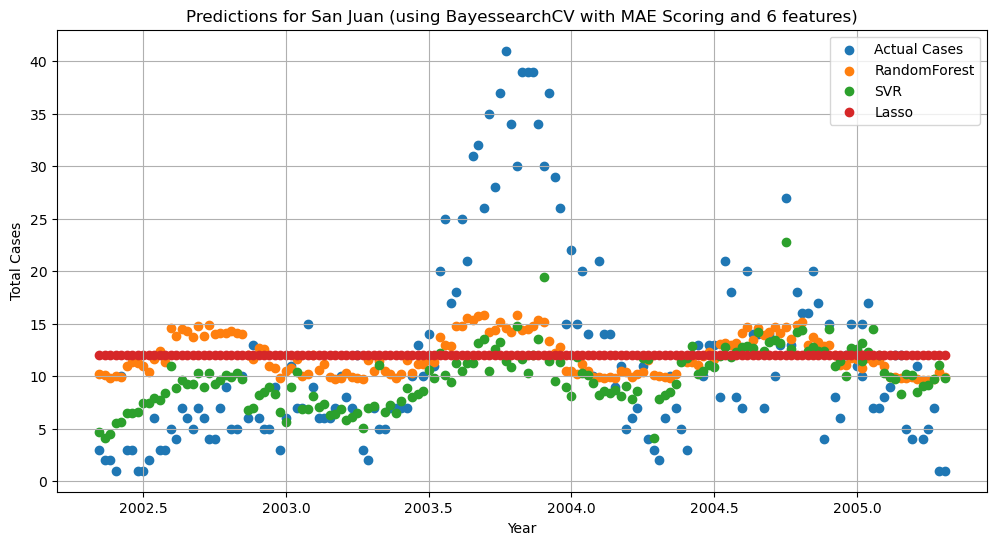

In [79]:
plot_X_test , plot_y_test = getPlotSet('sj',4)
matching_train_data = sj.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in six_feature_MAE_SJ_model_list:
    if i>2:
        break
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for San Juan (using BayessearchCV with MAE Scoring and 6 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

In [80]:

six_feature_MAE_SJ_model_list = []
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'RandomForest', param_space_rf, scoring,split_position = 3))
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'SVR', param_space_svr, scoring,split_position = 3 ))
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'Lasso', param_space_lasso, scoring, split_position = 3 ))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

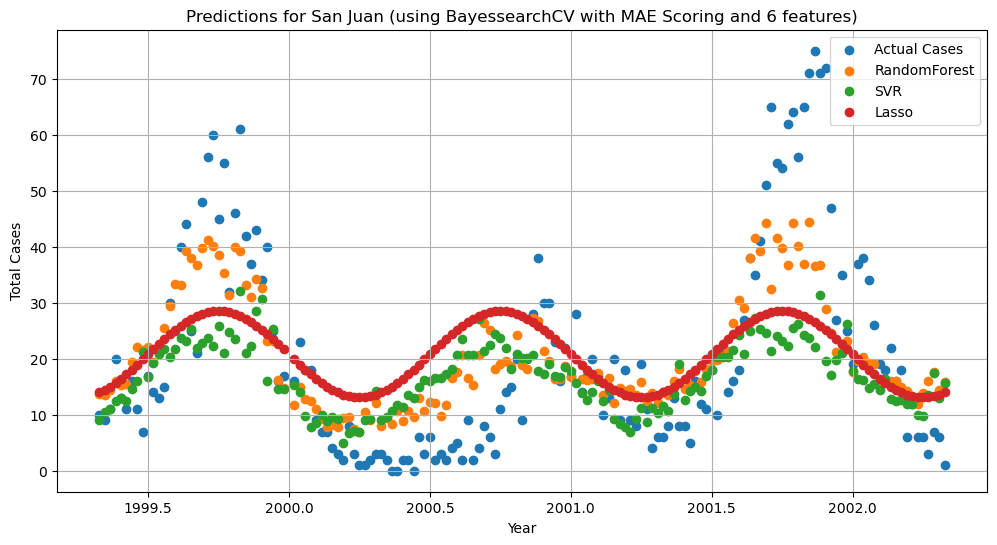

In [81]:
plot_X_test , plot_y_test = getPlotSet('sj',3)
matching_train_data = sj.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in six_feature_MAE_SJ_model_list:
    if i>2:
        break
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for San Juan (using BayessearchCV with MAE Scoring and 6 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

In [82]:
six_feature_MAE_SJ_model_list = []
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'RandomForest', param_space_rf, scoring,split_position = 2))
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'SVR', param_space_svr, scoring,split_position = 2 ))
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'Lasso', param_space_lasso, scoring, split_position = 2 ))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 1.0, 1.0, 0.0001, 'linear'] before, using random point [0.020191029464589547, -1.0, 0.30879160125430244, 0.05221683233969072, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 1.0, 1.0, 0.0001, 'linear'] before, using random point [0.3700536717289944, -1.0, 0.868295511346994, 0.004609687063200152, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 1.0, 1.0, 0.0001, 'linear'] before, using random point [0.21360235440988018, 1.0, 0.7628890093312104, 0.002289512958765448, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

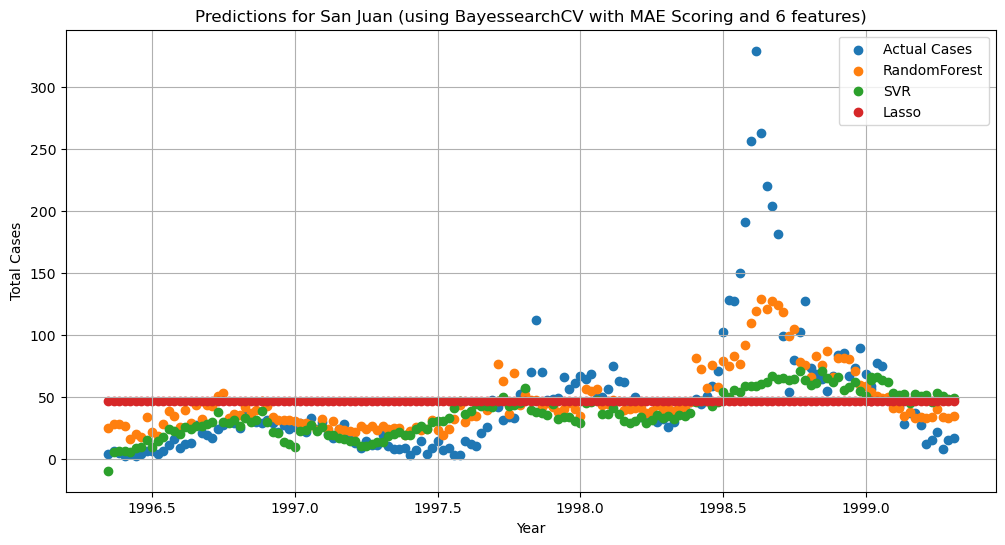

In [83]:
plot_X_test , plot_y_test = getPlotSet('sj',2)
matching_train_data = sj.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in six_feature_MAE_SJ_model_list:
    if i>2:
        break
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for San Juan (using BayessearchCV with MAE Scoring and 6 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

In [84]:
six_feature_MAE_SJ_model_list = []
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'RandomForest', param_space_rf, scoring,split_position = 1))
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'SVR', param_space_svr, scoring,split_position = 1 ))
six_feature_MAE_SJ_model_list.append(get_6feature_model('sj', 'Lasso', param_space_lasso, scoring, split_position = 1 ))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

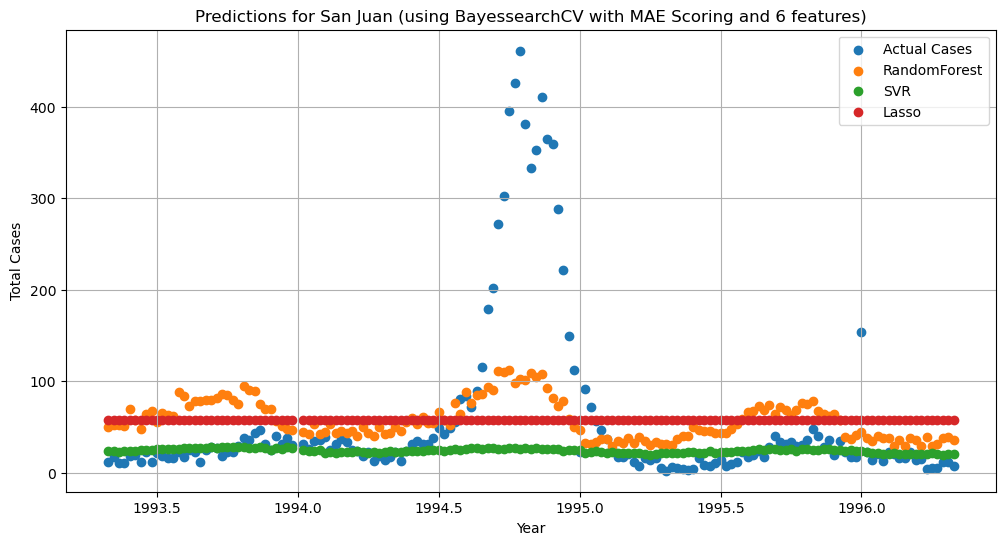

In [85]:
plot_X_test , plot_y_test = getPlotSet('sj',1)
matching_train_data = sj.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in six_feature_MAE_SJ_model_list:
    if i>2:
        break
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for San Juan (using BayessearchCV with MAE Scoring and 6 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

### For the city of Iquitos MAE Scoring and 6 features

In [86]:
six_feature_MAE_IQ_model_list = []
## Creating 6feature_MAE_SJ_RF_model
param_space_rf = {
    'randomforest__n_estimators': Integer(50, 200),  
    'randomforest__max_depth': Integer(3, 10),  
    'randomforest__min_samples_split': Integer(2, 10),  
    'randomforest__min_samples_leaf': Integer(1, 5), 
    'randomforest__max_features': Real(0.1, 0.5) 
}
param_space_svr = {
    'svr__kernel': Categorical(['rbf']),  
    'svr__C': Real(0.1, 100, prior='log-uniform'),  
    'svr__gamma': Real(0.0001, 1, prior='log-uniform'),  
    'svr__epsilon': Real(0.1, 0.5, prior='uniform')  
}
param_space_lasso = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring = 'neg_mean_absolute_error'
six_feature_MAE_IQ_model_list = []
six_feature_MAE_IQ_model_list.append(get_6feature_model('iq', 'RandomForest', param_space_rf, scoring,split_position = 5))
six_feature_MAE_IQ_model_list.append(get_6feature_model('iq', 'SVR', param_space_svr, scoring,split_position = 5 ))
six_feature_MAE_IQ_model_list.append(get_6feature_model('iq', 'Lasso', param_space_lasso, scoring, split_position = 5 ))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

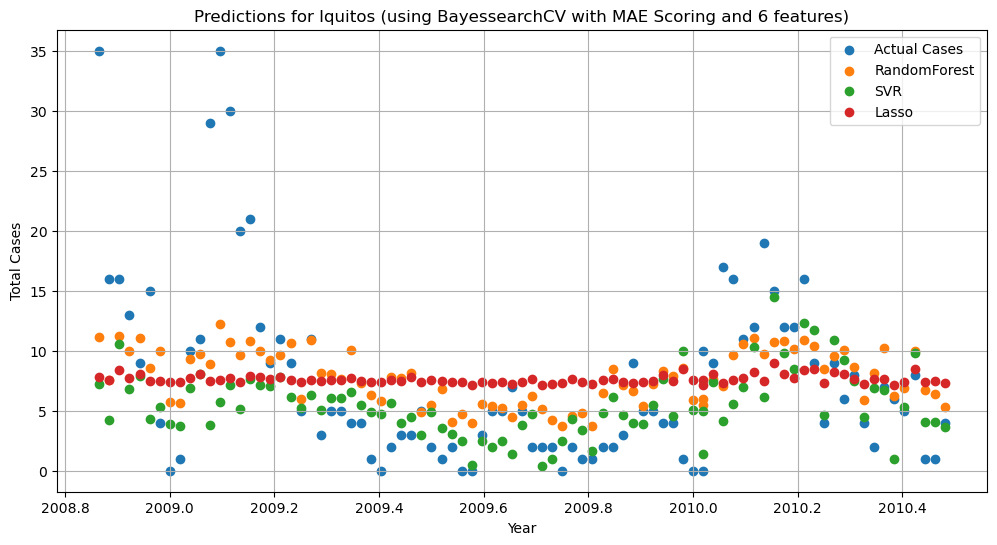

In [87]:
plot_X_test , plot_y_test = getPlotSet('iq',5)
matching_train_data = iq.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in six_feature_MAE_IQ_model_list:
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for Iquitos (using BayessearchCV with MAE Scoring and 6 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

In [88]:
six_feature_MAE_IQ_model_list = []
six_feature_MAE_IQ_model_list.append(get_6feature_model('iq', 'RandomForest', param_space_rf, scoring,split_position = 2))
six_feature_MAE_IQ_model_list.append(get_6feature_model('iq', 'SVR', param_space_svr, scoring,split_position = 2 ))
six_feature_MAE_IQ_model_list.append(get_6feature_model('iq', 'Lasso', param_space_lasso, scoring, split_position = 2 ))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

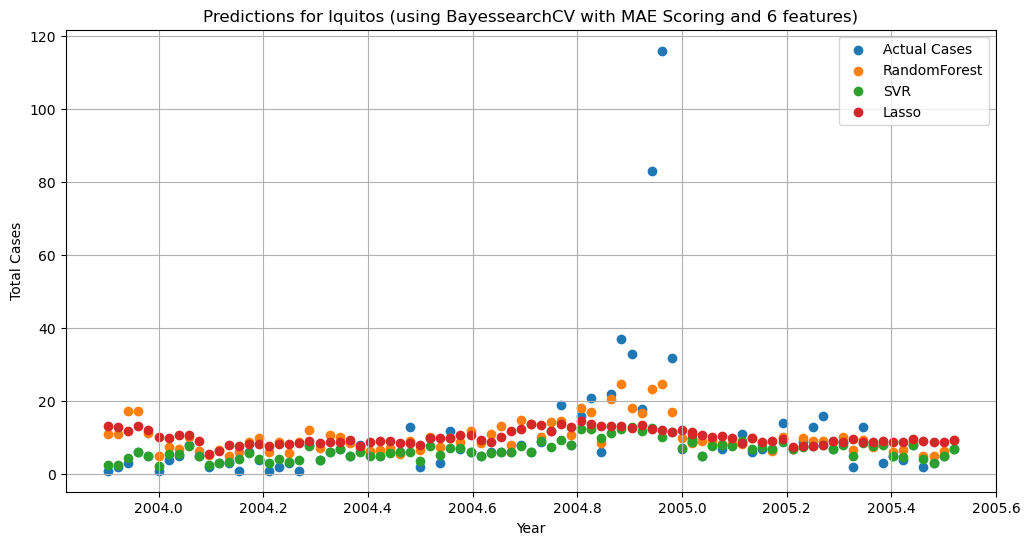

In [89]:
plot_X_test , plot_y_test = getPlotSet('iq',2)
matching_train_data = iq.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in six_feature_MAE_IQ_model_list:
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for Iquitos (using BayessearchCV with MAE Scoring and 6 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

### How Does varying the performance metric affect the performance/results?

In [90]:
six_feature_R2_IQ_model_list = []
# Creating 6feature_MAE_SJ_RF_model
param_space_rf = {
    'randomforest__n_estimators': Integer(200, 800), 
    'randomforest__max_depth': Integer(10, 30),  
    'randomforest__min_samples_split': Integer(2, 20), 
    'randomforest__min_samples_leaf': Integer(1, 15),  
    'randomforest__max_features': Real(0.3, 1.0) 
}
param_space_svr = {
    'svr__kernel': Categorical(['rbf']),
    'svr__C': Real(1e-3, 150, prior='log-uniform'),
    'svr__gamma': Real(1e-4, 2, prior='log-uniform'),
    'svr__epsilon': Real(0.05, 1.5, prior='uniform')
}
param_space_lasso = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring = 'r2'
six_feature_R2_IQ_model_list = []
six_feature_R2_IQ_model_list.append(get_6feature_model('iq', 'RandomForest', param_space_rf, scoring,split_position = 5))
six_feature_R2_IQ_model_list.append(get_6feature_model('iq', 'SVR', param_space_svr, scoring,split_position = 5 ))
six_feature_R2_IQ_model_list.append(get_6feature_model('iq', 'Lasso', param_space_lasso, scoring, split_position = 5 ))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

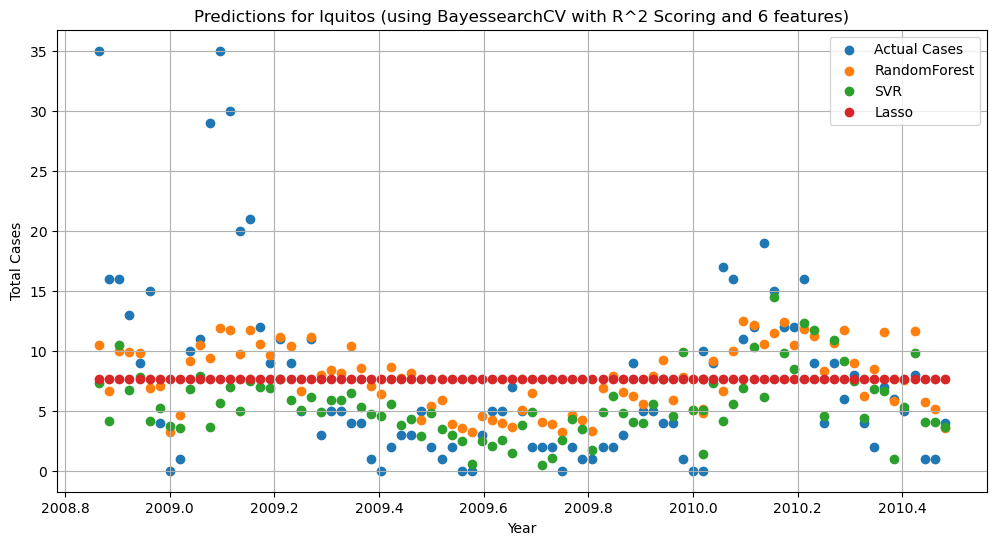

In [91]:
plot_X_test , plot_y_test = getPlotSet('iq',5)
matching_train_data = iq.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in six_feature_R2_IQ_model_list:
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for Iquitos (using BayessearchCV with R^2 Scoring and 6 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

In [92]:
six_feature_R2_SJ_model_list = []
## Creating 6feature_MAE_SJ_RF_model
param_space_rf = {
    'randomforest__n_estimators': Integer(1000, 2000), 
    'randomforest__max_depth': Integer(50, 150),  
    'randomforest__min_samples_split': Integer(2, 150),  
    'randomforest__min_samples_leaf': Integer(1, 50),  
    'randomforest__max_features': Real(0.01, 0.5)  
}
param_space_svr = {
    'svr__kernel': Categorical(['rbf']),  # Continue focusing on the 'rbf' kernel
    'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
    'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
    'svr__epsilon': Real(0.01, 1.0, prior='uniform')
}
param_space_lasso = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring = 'r2'
six_feature_R2_SJ_model_list = []
six_feature_R2_SJ_model_list.append(get_6feature_model('sj', 'RandomForest', param_space_rf, scoring,split_position = 5))
six_feature_R2_SJ_model_list.append(get_6feature_model('sj', 'SVR', param_space_svr, scoring,split_position = 5 ))
six_feature_R2_SJ_model_list.append(get_6feature_model('sj', 'Lasso', param_space_lasso, scoring, split_position = 5 ))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

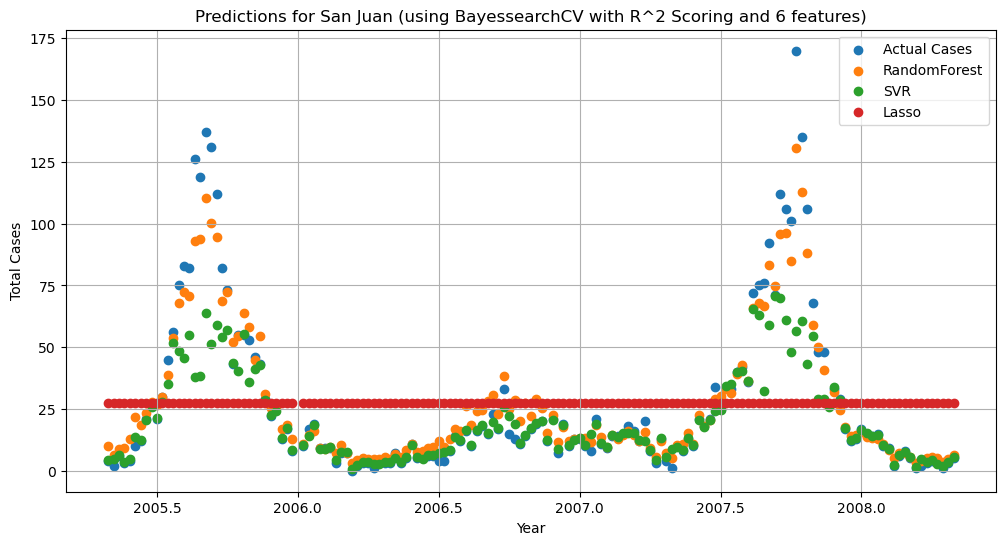

In [93]:
plot_X_test , plot_y_test = getPlotSet('sj',5)
matching_train_data = sj.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in six_feature_R2_SJ_model_list:
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for San Juan (using BayessearchCV with R^2 Scoring and 6 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

In [94]:
six_feature_R2_SJ_model_list = []
## Creating 6feature_MAE_SJ_RF_model
param_space_rf = {
    'randomforest__n_estimators': Integer(1000, 2000),  
    'randomforest__max_depth': Integer(50, 150), 
    'randomforest__min_samples_split': Integer(2, 150),
    'randomforest__min_samples_leaf': Integer(1, 50),  
    'randomforest__max_features': Real(0.01, 0.5)  
}
param_space_svr = {
    'svr__kernel': Categorical(['rbf']),  # Continue focusing on the 'rbf' kernel
    'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
    'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
    'svr__epsilon': Real(0.01, 1.0, prior='uniform')
}
param_space_lasso = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring = 'r2'
six_feature_R2_SJ_model_list = []
six_feature_R2_SJ_model_list.append(get_6feature_model('sj', 'RandomForest', param_space_rf, scoring,split_position = 3))
six_feature_R2_SJ_model_list.append(get_6feature_model('sj', 'SVR', param_space_svr, scoring,split_position = 3 ))
six_feature_R2_SJ_model_list.append(get_6feature_model('sj', 'Lasso', param_space_lasso, scoring, split_position = 3 ))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

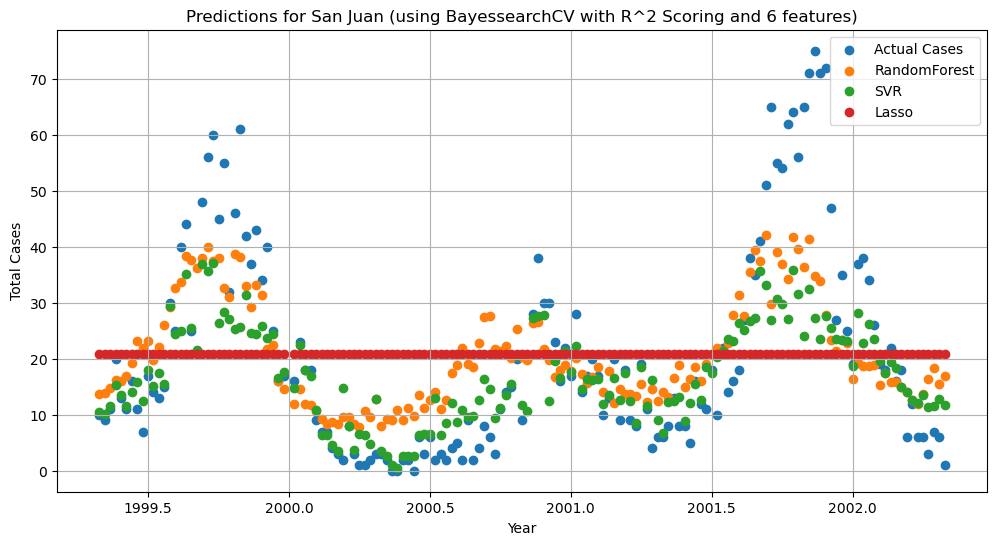

In [95]:
plot_X_test , plot_y_test = getPlotSet('sj',3)
matching_train_data = sj.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in six_feature_R2_SJ_model_list:
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for San Juan (using BayessearchCV with R^2 Scoring and 6 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

In [96]:
six_feature_R2_SJ_model_list = []
## Creating 6feature_MAE_SJ_RF_model
param_space_rf = {
    'randomforest__n_estimators': Integer(1000, 2000), 
    'randomforest__max_depth': Integer(50, 150),  
    'randomforest__min_samples_split': Integer(2, 150),  
    'randomforest__min_samples_leaf': Integer(1, 50),  
    'randomforest__max_features': Real(0.01, 0.5) 
}
param_space_svr = {
    'svr__kernel': Categorical(['rbf']),  
    'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
    'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
    'svr__epsilon': Real(0.01, 1.0, prior='uniform')
}
param_space_lasso = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring = 'r2'
six_feature_R2_SJ_model_list = []
six_feature_R2_SJ_model_list.append(get_6feature_model('sj', 'RandomForest', param_space_rf, scoring,split_position = 2))
six_feature_R2_SJ_model_list.append(get_6feature_model('sj', 'SVR', param_space_svr, scoring,split_position = 2 ))
six_feature_R2_SJ_model_list.append(get_6feature_model('sj', 'Lasso', param_space_lasso, scoring, split_position = 2 ))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

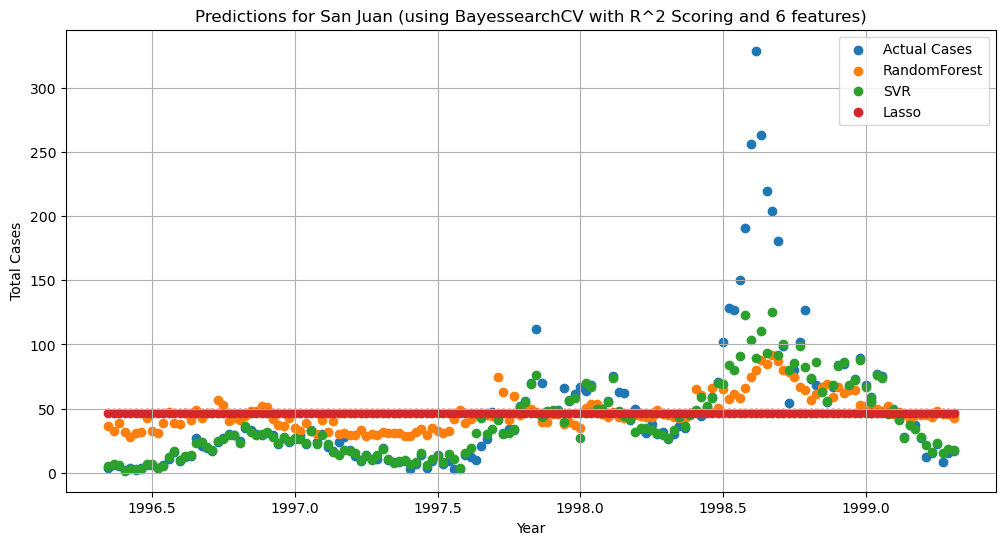

In [97]:
plot_X_test , plot_y_test = getPlotSet('sj',2)
matching_train_data = sj.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in six_feature_R2_SJ_model_list:
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for San Juan (using BayessearchCV with R^2 Scoring and 6 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

In [98]:
six_feature_R2_SJ_model_list = []
## Creating 6feature_MAE_SJ_RF_model
param_space_rf = {
    'randomforest__n_estimators': Integer(1000, 2000),  
    'randomforest__max_depth': Integer(50, 150),  
    'randomforest__min_samples_split': Integer(2, 150),  
    'randomforest__min_samples_leaf': Integer(1, 50),  
    'randomforest__max_features': Real(0.01, 0.5) 
}
param_space_svr = {
    'svr__kernel': Categorical(['rbf']),  
    'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
    'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
    'svr__epsilon': Real(0.01, 1.0, prior='uniform')
}
param_space_lasso = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring = 'r2'
six_feature_R2_SJ_model_list = []
six_feature_R2_SJ_model_list.append(get_6feature_model('sj', 'RandomForest', param_space_rf, scoring,split_position = 1))
six_feature_R2_SJ_model_list.append(get_6feature_model('sj', 'SVR', param_space_svr, scoring,split_position = 1 ))
six_feature_R2_SJ_model_list.append(get_6feature_model('sj', 'Lasso', param_space_lasso, scoring, split_position = 1 ))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

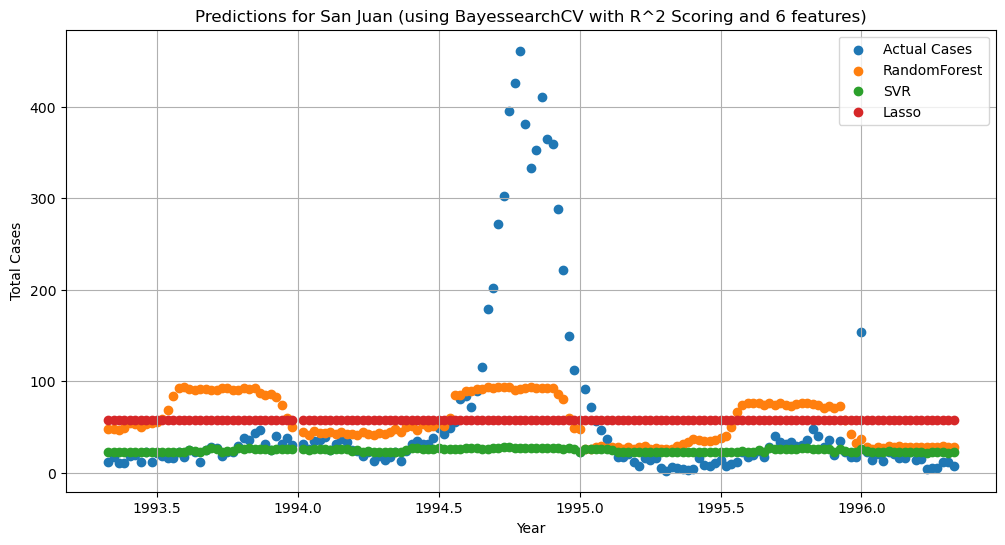

In [99]:
plot_X_test , plot_y_test = getPlotSet('sj',1)
matching_train_data = sj.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in six_feature_R2_SJ_model_list:
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for San Juan (using BayessearchCV with R^2 Scoring and 6 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

# NOTE before the calculations below:
**It was decided that the Trials would be commented out. The different trials were used to explore the hyperparameter space and select a space that allows for better performance metrics but also runs relatively quickly. After a good enough hyperparameter space was selected it was used to compute the aggregate performance metrics using Nested CV. Confidence interval by repeating the process of NestedCV with Bayesian search for hyperparameters 10 times**

# Sundeep: SVM 6 features_ Trials and Performance Metrics

In [100]:
# Bayesian Hyperparameter Optimization SVM - SJ -  6 features - MAE Scoring

### Trial 1

In [101]:
from sklearn.svm import SVR

In [102]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'sigmoid', 'linear']),
#     'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
#     'svr__coef0': Real(-1.0, 1.0, prior='uniform'),  
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Trial 2

In [104]:


# param_space = {
#     'svr__kernel': Categorical(['linear', 'sigmoid']),
#     'svr__C': Real(1e-4, 10, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 1, prior='log-uniform'),  
#     'svr__coef0': Real(-1.0, 1.0, prior='uniform'), 
#     'svr__epsilon': Real(0.1, 1.0, prior='uniform') 
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'SVR' ,  param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 3

In [105]:

# 
# param_space = {
#     'svr__kernel': Categorical(['linear', 'sigmoid']),  
#     'svr__C': Real(0.01, 1, prior='log-uniform'),  
#     'svr__gamma': Real(0.0001, 0.1, prior='log-uniform'), 
#     'svr__coef0': Categorical([-1.0, 1.0]), 
#     'svr__epsilon': Categorical([0.1, 1.0])  
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'SVR' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 4

In [106]:
# # Define the parameter space
# param_space = {
#     'svr__kernel': Categorical(['linear', 'sigmoid']),  
#     'svr__C': Real(0.01, 1, prior='log-uniform'), 
#     'svr__gamma': Real(0.0001, 0.1, prior='log-uniform'), 
#     'svr__coef0': Categorical([-1.0, 1.0]), 
#     'svr__epsilon': Real(0.1, 1.0, prior='uniform')  
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'SVR' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

**More exploration has lead to no real improvement in the performance metrics, therefore we stop`m optimizing the param space**

In [107]:
## Getting Performance metrics of SVM SJ -- MAE Scoring

In [108]:
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

param_space = {
    'svr__kernel': Categorical(['linear', 'sigmoid']),  
    'svr__C': Real(0.01, 1, prior='log-uniform'),  
    'svr__gamma': Real(0.0001, 0.1, prior='log-uniform'),  
    'svr__coef0': Categorical([-1.0, 1.0]),  
    'svr__epsilon': Real(0.1, 1.0, prior='uniform')  
}
scoring='neg_mean_absolute_error'

aggregatePerformanceMetrics('sj', 'SVR' , param_space,scoring)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 1.0, 1.0, 0.1, 'sigmoid'] before, using random point [0.24691810728390545, -1.0, 0.5632094450953299, 0.00018040343567262538, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, -1.0, 1.0, 0.0001, 'sigmoid'] before, using random point [0.17657441088780454, -1.0, 0.43820515075899324, 0.004337996886746261, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 1.0, 1.0, 0.0001, 'sigmoid'] before, using random point [0.028629343089507403, -1.0, 0.31742137568261475, 0.003005312236143235, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 1.0, 1.0, 0.0001, 'sigmoid'] before, using random point [0.1072841565596585, 1.0, 0.5010294463467494, 0.004080216809071875, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, -1.0, 1.0, 0.0001, 'sigmoid'] before, using random point [0.6034970819759149, -1.0, 0.24989695181400343, 0.006169859402862051, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1.0, 1.0, 0.1, 'sigmoid'] before, using random point [0.03137970319025987, 1.0, 0.6698192687693928, 0.00013691145293398869, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1.0, 1.0, 0.1, 'sigmoid'] before, using random point [0.027879448224762595, -1.0, 0.11212089371468134, 0.021640355623451266, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 1.0, 1.0, 0.1, 'sigmoid'] before, using random point [0.06532182898046125, -1.0, 0.21763951397966724, 0.0020187942167046832, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, -1.0, 1.0, 0.1, 'linear'] before, using random point [0.4422707184532234, -1.0, 0.5485902405258493, 0.014137618639864968, 'sigmoid']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, -1.0, 1.0, 0.1, 'linear'] before, using random point [0.745346572672581, -1.0, 0.1259997857095186, 0.0002297887602182275, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, -1.0, 1.0, 0.0001, 'linear'] before, using random point [0.16544798976644026, 1.0, 0.3281481264609375, 0.08297508113512635, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, -1.0, 1.0, 0.0001, 'linear'] before, using random point [0.13063278810092835, 1.0, 0.40884042312784796, 0.0002719839692377869, 'sigmoid']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, -1.0, 1.0, 0.0001, 'linear'] before, using random point [0.22553479402518017, -1.0, 0.28666208849879227, 0.004129892508596588, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, -1.0, 1.0, 0.0001, 'linear'] before, using random point [0.044125963236403366, 1.0, 0.1733242949498418, 0.013958899868932928, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, -1.0, 1.0, 0.0001, 'linear'] before, using random point [0.312017665524707, 1.0, 0.7874380015019113, 0.007867527130298564, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# Sundeep: Bayesian Hyperparameter Optimization SVM - SJ -  6 features - R^2 Scoring

### Trial 1

In [111]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'sigmoid', 'linear']),
#     'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
#     'svr__coef0': Real(-1.0, 1.0, prior='uniform'), 
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')
# }
# scoring='r2'

# scoresAndBestParams('sj', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 2

In [112]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'linear']),  
#     'svr__C': Real(0.1, 100, prior='log-uniform'),  
#     'svr__gamma': Real(1e-4, 1.0, prior='log-uniform'),  
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform') 
# }
# scoring='r2'

# scoresAndBestParams('sj', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 3

In [113]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'linear']), 
#     'svr__C': Real(0.1, 100, prior='log-uniform'),  
#     'svr__gamma': Real(1e-4, 0.1, prior='log-uniform'),  
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform') 
# }
# scoring='r2'

# scoresAndBestParams('sj', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 4

In [114]:
# param_space = {
#     'svr__kernel': Categorical(['rbf']), 
#     'svr__C': Real(1, 200, prior='log-uniform'),  
#     'svr__gamma': Real(1e-4, 1, prior='log-uniform'),  
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')  
# }
# scoring='r2'

# scoresAndBestParams('sj', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 5

In [115]:
# param_space = {
#     'svr__kernel': Categorical(['rbf']),  
#     'svr__C': Real(1e-2, 1e2, prior='log-uniform'),  
#     'svr__gamma': Real(1e-4, 1e0, prior='log-uniform'),
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')
# }
# scoring='r2'
# scoresAndBestParams('sj', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 6

In [116]:
# param_space = {
#     'svr__kernel': Categorical(['rbf']),  
#     'svr__C': Real(1, 30, prior='uniform'),  
#     'svr__gamma': Real(1e-4, 1.5, prior='log-uniform'),  
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')  
# }
# scoring='r2'
# scoresAndBestParams('sj', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 7

In [117]:
# param_space = {
#     'svr__kernel': Categorical(['rbf']),  
#     'svr__C': Real(1e-2, 100, prior='log-uniform'), 
#     'svr__gamma': Real(1e-4, 1, prior='log-uniform'),  
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform') 
# }
# scoring='r2'
# scoresAndBestParams('sj', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

**We get diminishing returns, therefore we stop optimizing the param space**

## Getting Performance metrics of SVM SJ -- R^2 Scoring

In [118]:
param_space = {
    'svr__kernel': Categorical(['rbf']),  
    'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
    'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
    'svr__epsilon': Real(0.01, 1.0, prior='uniform')
}
scoring='r2'

aggregatePerformanceMetrics('sj', 'SVR' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# Sundeep: Bayesian Hyperparameter Optimization SVM - IQ - 6 features - MAE Scoring

### Trial 1

In [119]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'sigmoid', 'linear']),
#     'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
#     'svr__coef0': Real(-1.0, 1.0, prior='uniform'),  
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 2

In [120]:
# param_space = {
#     'svr__kernel': Categorical(['linear', 'rbf']),
#     'svr__C': Real(0.001, 100, prior='log-uniform'),
#     'svr__gamma': Real(0.0001, 1, prior='log-uniform'),  
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')
# }

# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 1.0, 1.0, 'linear'] before, using random point [0.0013716278908678158, 0.7082833030190041, 0.0013785188391590535, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 3

In [121]:
# param_space = {
#     'svr__kernel': Categorical(['rbf']),  
#     'svr__C': Real(0.01, 100, prior='log-uniform'),  
#     'svr__gamma': Real(0.0001, 1, prior='log-uniform'),  
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform') 
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 4

In [122]:
# param_space = {
#     'svr__kernel': Categorical(['rbf']), 
#     'svr__C': Real(0.1, 100, prior='log-uniform'),  
#     'svr__gamma': Real(0.0001, 1, prior='log-uniform'),  
#     'svr__epsilon': Real(0.1, 0.5, prior='uniform') 
# }

# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

**We get diminishing returns, so we stop optimizing the param space**

## Getting Performance metrics of SVM IQ -- Mean absolute error Scoring

In [125]:
param_space = {
    'svr__kernel': Categorical(['rbf']),  
    'svr__C': Real(0.1, 100, prior='log-uniform'),  
    'svr__gamma': Real(0.0001, 1, prior='log-uniform'),  
    'svr__epsilon': Real(0.1, 0.5, prior='uniform')  
}
scoring='neg_mean_absolute_error'

aggregatePerformanceMetrics('iq', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# Sundeep: Bayesian Hyperparameter Optimization SVM - IQ  - R^2 Scoring

### Trial 1

In [126]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'sigmoid', 'linear']),
#     'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
#     'svr__coef0': Real(-1.0, 1.0, prior='uniform'), 
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')
# }
# scoring='r2'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 2

In [127]:
# param_space = {
#     'svr__kernel': Categorical(['sigmoid', 'linear', 'rbf']),
#     'svr__C': Real(1e-3, 100, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 1, prior='log-uniform'),
#     'svr__coef0': Real(0.9,1.5, prior='uniform'),
#     'svr__epsilon': Real(0.1, 1.3, prior='uniform')
# }
# scoring='r2'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 3

In [ ]:
# param_space = {
#     'svr__kernel': Categorical(['linear', 'rbf']),
#     'svr__C': Real(1e-3, 150, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 2, prior='log-uniform'),
#     'svr__epsilon': Real(0.05, 1.5, prior='uniform')
# }
# scoring='r2'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Trial 4

In [ ]:
# param_space = {
#     'svr__kernel': Categorical(['rbf']),
#     'svr__C': Real(1e-2, 200, prior='log-uniform'),
#     'svr__gamma': Real(1e-1, 5, prior='log-uniform'),
#     'svr__epsilon': Real(0.025, 2, prior='uniform')
# }
# scoring='r2'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

### Trial 5

In [ ]:
# param_space = {
#     'svr__kernel': Categorical(['rbf']),
#     'svr__C': Real(1e-3, 150, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 2, prior='log-uniform'),
#     'svr__epsilon': Real(0.05, 1.5, prior='uniform')
# }

# scoring='r2'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

**Diminishing imporvements, therefore we move on to evaluate performance metrics with confidence**

## Getting Performance metrics of SVM IQ -- R^2 Scoring

### Diminishing improvements therefore we proceed to eveluating performance metrics

In [31]:
param_space = {
    'svr__kernel': Categorical(['rbf']),
    'svr__C': Real(1e-3, 150, prior='log-uniform'),
    'svr__gamma': Real(1e-4, 2, prior='log-uniform'),
    'svr__epsilon': Real(0.05, 1.5, prior='uniform')
}
scoring='r2'

aggregatePerformanceMetrics('iq', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 1.5, 2.0, 'rbf'] before, using random point [0.006602950861209676, 1.1843356035658803, 0.04511263039589148, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 1.5, 2.0, 'rbf'] before, using random point [0.006049525546099594, 0.23026786600049914, 0.0024933370097533995, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 1.5, 2.0, 'rbf'] before, using random point [0.010776280510748157, 0.5073452058121425, 0.01582839966262828, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 1.5, 2.0, 'rbf'] before, using random point [0.0010369715659033051, 0.7610920171277732, 0.0006328108855801713, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 1.5, 2.0, 'rbf'] before, using random point [0.138113035135439, 0.2503214665922972, 0.005528118761773254, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 1.5, 2.0, 'rbf'] before, using random point [38.53965611450225, 0.4570535305464193, 0.614125208305515, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 0.05, 2.0, 'rbf'] before, using random point [0.9838840689131237, 0.9694097355086939, 0.0021366145008278508, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 0.05, 2.0, 'rbf'] before, using random point [0.04374324533500589, 0.7458841745828563, 0.38825153929921785, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 0.05, 2.0, 'rbf'] before, using random point [0.017511121297098208, 0.6662937492570333, 0.09571883511219278, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 0.05, 2.0, 'rbf'] before, using random point [0.039939826885644514, 0.18299045806678355, 0.003502158197065335, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 0.05, 2.0, 'rbf'] before, using random point [0.0012112848942409393, 0.10237174183286421, 0.04552787584459116, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 0.05, 2.0, 'rbf'] before, using random point [35.978907084333734, 1.1532841219350993, 0.3716426816375195, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 0.05, 2.0, 'rbf'] before, using random point [0.06300525080807252, 0.5082334833773114, 0.0003619140743352832, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 0.05, 2.0, 'rbf'] before, using random point [0.0015757069359953588, 0.8461798956928303, 0.009862104845264293, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 0.05, 2.0, 'rbf'] before, using random point [0.5714378396498687, 0.07265129882019317, 0.0005788457294536561, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 0.05, 2.0, 'rbf'] before, using random point [0.28924734524930146, 0.8883112770888819, 0.006712091268133506, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 0.05, 2.0, 'rbf'] before, using random point [81.66605388304913, 1.2166112012556627, 0.04713812745937636, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 0.05, 2.0, 'rbf'] before, using random point [2.2431765230315057, 0.7116636854567021, 0.0011668599613873292, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150.0, 0.05, 0.0001, 'rbf'] before, using random point [126.57336943966604, 0.97246245263613, 1.6113531481833037, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# Deniz: Random Forest 6 Features

# Deniz: Bayesian Hyperparameter Optimization RF - SJ -  6 features - MAE Scoring

### Trial 1

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
# param_space = {
#     'randomforest__n_estimators': Integer(50, 200),  
#     'randomforest__max_depth': Integer(5, 20), 
#     'randomforest__min_samples_split': Integer(2, 20),  
#     'randomforest__min_samples_leaf': Integer(1, 10),  
#     'randomforest__max_features': Real(0.1, 1.0)  
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [34]:
### Trial 2

In [35]:

# param_space = {
#     'randomforest__n_estimators': Integer(10, 100), 
#     'randomforest__max_depth': Integer(5, 25),  
#     'randomforest__min_samples_split': Integer(2, 30),  
#     'randomforest__min_samples_leaf': Integer(1, 15),  
#     'randomforest__max_features': Real(0.05, 0.5)  
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'RandomForest' ,  param_space,scoring)

In [36]:
### Trial 3

In [37]:

# param_space = {
#     'randomforest__n_estimators': Integer(50, 200),  
#     'randomforest__max_depth': Integer(5, 30),  
#     'randomforest__min_samples_split': Integer(2, 30),  
#     'randomforest__min_samples_leaf': Integer(1, 20), 
#     'randomforest__max_features': Real(0.01, 0.1) 
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'RandomForest' , param_space,scoring)

In [38]:
### Trial 4

In [39]:

# param_space = {
#     'randomforest__n_estimators': Integer(50, 300),  
#     'randomforest__max_depth': Integer(5, 35),  
#     'randomforest__min_samples_split': Integer(2, 40),  
#     'randomforest__min_samples_leaf': Integer(1, 25),  
#     'randomforest__max_features': Real(0.05, 0.15) 
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'RandomForest' , param_space,scoring)

**More exploration has lead to no real improvement in the performance metrics, therefore we stop optimizing the param space**

In [40]:
## Getting Performance metrics of RF SJ -- MAE Scoring

In [41]:
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

param_space = {
    'randomforest__n_estimators': Integer(50, 300),  
    'randomforest__max_depth': Integer(5, 35),  
    'randomforest__min_samples_split': Integer(2, 40),  
    'randomforest__min_samples_leaf': Integer(1, 25),  
    'randomforest__max_features': Real(0.05, 0.15)  
}
scoring='neg_mean_absolute_error'

aggregatePerformanceMetrics('sj', 'RandomForest' , param_space,scoring)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.15, 25, 2, 300] before, using random point [20, 0.14163483636085744, 18, 25, 193]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 25, 2, 300] before, using random point [19, 0.13836842321309192, 19, 33, 127]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.05, 25, 2, 50] before, using random point [33, 0.0722598479120827, 8, 13, 136]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.15, 25, 2, 50] before, using random point [32, 0.06804192367577167, 22, 8, 255]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.15, 25, 2, 50] before, using random point [24, 0.12741849915243986, 8, 24, 182]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.15, 25, 2, 50] before, using random point [33, 0.06936499247175698, 19, 29, 298]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.15, 25, 2, 50] before, using random point [6, 0.1492117122844737, 24, 28, 247]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.15, 16, 2, 300] before, using random point [26, 0.08186191548404768, 20, 28, 174]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.15, 25, 2, 300] before, using random point [6, 0.06036422961014733, 23, 10, 299]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 1, 2, 300] before, using random point [20, 0.0918615835345166, 19, 14, 124]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 1, 2, 300] before, using random point [18, 0.11271170505355656, 15, 12, 227]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 1, 2, 300] before, using random point [14, 0.11467140720097949, 7, 3, 280]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 1, 2, 300] before, using random point [9, 0.07420413276993101, 10, 4, 61]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 1, 2, 300] before, using random point [20, 0.12343909865688736, 4, 36, 199]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 1, 2, 300] before, using random point [34, 0.1486707553022823, 2, 17, 135]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 1, 2, 300] before, using random point [10, 0.08700267156613883, 11, 6, 236]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 25, 40, 300] before, using random point [35, 0.059941139366766975, 6, 6, 154]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 25, 40, 300] before, using random point [31, 0.13331924658684252, 3, 26, 189]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 25, 40, 300] before, using random point [20, 0.08759064997147752, 13, 23, 162]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 25, 40, 300] before, using random point [10, 0.07947393199097284, 8, 9, 292]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 25, 40, 300] before, using random point [7, 0.10663577477204508, 17, 36, 168]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 25, 40, 50] before, using random point [28, 0.11354294281574417, 22, 18, 216]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 25, 40, 50] before, using random point [27, 0.09539947368378004, 6, 18, 292]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 25, 40, 50] before, using random point [21, 0.12999203898852846, 18, 37, 254]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 25, 40, 50] before, using random point [16, 0.06506965482111629, 3, 2, 58]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [35, 0.05, 25, 40, 50] before, using random point [19, 0.07382085039443757, 10, 32, 228]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 0.05, 25, 2, 50] before, using random point [7, 0.05646383566622956, 18, 30, 95]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 0.05, 25, 2, 50] before, using random point [15, 0.0679471319934771, 13, 20, 113]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
MAE: Mean = 31.7792, 95% CI = [31.1457, 32.4127]
MSE: Mean = 2814.6854, 95% CI = [2751.5308, 2877.8400]
RMSE: Mean = 47.3690, 95% CI = [46.6221, 48.1159]
R^2: Mean = -2.0946, 95% CI = [-2.2714, -1.9177]


## Deniz: Bayesian Hyperparameter Optimization RF - SJ -  6 features - R^2 Scoring

In [43]:
### Trial 1

In [44]:
# param_space = {
#     'randomforest__n_estimators': Integer(100, 500), 
#     'randomforest__max_depth': Integer(10, 50),  
#     'randomforest__min_samples_split': Integer(2, 50), 
#     'randomforest__min_samples_leaf': Integer(1, 30),  
#     'randomforest__max_features': Real(0.01, 0.5)  
# }
# scoring='r2'

# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [45]:
### Trial 2

In [46]:
# param_space = {
#     'randomforest__n_estimators': Integer(50, 300), 
#     'randomforest__max_depth': Integer(5, 50),  
#     'randomforest__min_samples_split': Integer(2, 50), 
#     'randomforest__min_samples_leaf': Integer(1, 30),  
#     'randomforest__max_features': Real(0.01, 0.5) 
# }
# scoring='r2'

# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [47]:
### Trial 3

In [48]:
# param_space = {
#     'randomforest__n_estimators': Integer(200, 500), 
#     'randomforest__max_depth': Integer(5, 50),  
#     'randomforest__min_samples_split': Integer(2, 50), 
#     'randomforest__min_samples_leaf': Integer(1, 30), 
#     'randomforest__max_features': Real(0.01, 0.5) 
# }
# scoring='r2'

# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [49]:
### Trial 4

In [50]:
# param_space = {
#     'randomforest__n_estimators': Integer(300, 800), 
#     'randomforest__max_depth': Integer(20, 60), 
#     'randomforest__min_samples_split': Integer(2, 50), 
#     'randomforest__min_samples_leaf': Integer(1, 30),  
#     'randomforest__max_features': Real(0.01, 0.5)  
# }
# scoring='r2'

# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [51]:
### Trial 5

In [52]:
# param_space = {
#     'randomforest__n_estimators': Integer(300, 1000),  
#     'randomforest__max_depth': Integer(30, 70), 
#     'randomforest__min_samples_split': Integer(2, 50), 
#     'randomforest__min_samples_leaf': Integer(1, 30), 
#     'randomforest__max_features': Real(0.01, 0.5)
# }
# scoring='r2'
# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [53]:
### Trial 6

In [54]:
# param_space = {
#     'randomforest__n_estimators': Integer(500, 1500),  
#     'randomforest__max_depth': Integer(30, 100), 
#     'randomforest__min_samples_split': Integer(2, 100),  
#     'randomforest__min_samples_leaf': Integer(1, 50),  
#     'randomforest__max_features': Real(0.01, 0.5)  
# }
# scoring='r2'
# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [55]:
### Trial 7

In [56]:
# param_space = {
#     'randomforest__n_estimators': Integer(1000, 2000),  
#     'randomforest__max_depth': Integer(50, 150),  
#     'randomforest__min_samples_split': Integer(2, 150), 
#     'randomforest__min_samples_leaf': Integer(1, 50),  
#     'randomforest__max_features': Real(0.01, 0.5) 
# }
# scoring='r2'
# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

**We get diminishing returns, therefore we stop optimizing the param space**

In [57]:
## Getting Performance metrics of RF SJ -- R^2 Scoring

In [58]:
param_space = {
    'randomforest__n_estimators': Integer(1000, 2000),  
    'randomforest__max_depth': Integer(50, 150),  
    'randomforest__min_samples_split': Integer(2, 150),  
    'randomforest__min_samples_leaf': Integer(1, 50), 
    'randomforest__max_features': Real(0.01, 0.5)  
}
scoring='r2'

aggregatePerformanceMetrics('sj', 'RandomForest' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [150, 0.5, 50, 2, 2000] before, using random point [85, 0.1768542281516322, 42, 14, 1582]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 0.5, 50, 2, 1000] before, using random point [82, 0.1089925956608037, 35, 28, 1540]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 0.5, 50, 2, 1000] before, using random point [74, 0.256188491059415, 29, 72, 1954]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 0.5, 50, 2, 1000] before, using random point [57, 0.448988200138818, 5, 46, 1493]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
MAE: Mean = 33.8950, 95% CI = [32.1385, 35.6516]
MSE: Mean = 3079.8809, 95% CI = [2868.1542, 3291.6075]
RMSE: Mean = 50.0072, 95% CI = [47.8260, 52.1885]
R^2: Mean = -3.0055, 95% CI = [-3.6315, -2.3794]


## Deniz: Bayesian Hyperparameter Optimization RF - IQ - 6 features - MAE Scoring

In [60]:
### Trial 1

In [61]:
# param_space = {
#     'randomforest__n_estimators': Integer(50, 200),  
#     'randomforest__max_depth': Integer(5, 20),  
#     'randomforest__min_samples_split': Integer(2, 20),  
#     'randomforest__min_samples_leaf': Integer(1, 10), 
#     'randomforest__max_features': Real(0.1, 1.0)  
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

In [62]:
### Trial 2

In [63]:
# param_space = {
#     'randomforest__n_estimators': Integer(50, 200),  
#     'randomforest__max_depth': Integer(3, 10),  
#     'randomforest__min_samples_split': Integer(2, 10),  
#     'randomforest__min_samples_leaf': Integer(1, 5),  
#     'randomforest__max_features': Real(0.1, 0.5)  
# }

# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

In [64]:
### Trial 3

In [65]:
# param_space = {
#     'randomforest__n_estimators': Integer(75, 150),
#     'randomforest__max_depth': Integer(5, 10),
#     'randomforest__min_samples_split': Integer(2, 8),
#     'randomforest__min_samples_leaf': Integer(1, 3),
#     'randomforest__max_features': Real(0.2, 0.5)
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

**We get diminishing returns, so we stop optimizing the param space**

In [66]:
## Getting Performance metrics of RF IQ -- Mean absolute error Scoring

In [67]:
param_space = {
    'randomforest__n_estimators': Integer(50, 200),  
    'randomforest__max_depth': Integer(3, 10),  
    'randomforest__min_samples_split': Integer(2, 10),  
    'randomforest__min_samples_leaf': Integer(1, 5),  
    'randomforest__max_features': Real(0.1, 0.5)  
}
scoring='neg_mean_absolute_error'

aggregatePerformanceMetrics('iq', 'RandomForest',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [3, 0.1, 1, 10, 50] before, using random point [6, 0.1036955625902991, 1, 10, 65]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Deniz: Bayesian Hyperparameter Optimization RF - IQ  - R^2 Scoring - 6 features

In [69]:
### Trial 1

In [70]:
# param_space = {
#     'randomforest__n_estimators': Integer(100, 500), 
#     'randomforest__max_depth': Integer(5, 20),  
#     'randomforest__min_samples_split': Integer(2, 10),  
#     'randomforest__min_samples_leaf': Integer(1, 5), 
#     'randomforest__max_features': Real(0.5, 1.0) 
# }
# scoring='r2'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

In [71]:
### Trial 2

In [72]:
# param_space = {
#     'randomforest__n_estimators': Integer(75, 200),  
#     'randomforest__max_depth': Integer(3, 15),  
#     'randomforest__min_samples_split': Integer(2, 10),  
#     'randomforest__min_samples_leaf': Integer(1, 5),  
#     'randomforest__max_features': Real(0.4, 1.0) 
# }
# scoring='r2'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

In [73]:
### Trial 3

In [74]:
# param_space = {
#     'randomforest__n_estimators': Integer(100, 300), 
#     'randomforest__max_depth': Integer(3, 15),  
#     'randomforest__min_samples_split': Integer(2, 10), 
#     'randomforest__min_samples_leaf': Integer(1, 5),  
#     'randomforest__max_features': Real(0.3, 1.0) 
# }
# scoring='r2'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

In [75]:
### Trial 4

In [76]:
# param_space = {
#     'randomforest__n_estimators': Integer(100, 500), 
#     'randomforest__max_depth': Integer(3, 20),  
#     'randomforest__min_samples_split': Integer(2, 20),  
#     'randomforest__min_samples_leaf': Integer(1, 10),  
#     'randomforest__max_features': Real(0.3, 1.0)  
# }
# scoring='r2'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

In [77]:
### Trial 5

In [78]:
# param_space = {
#     'randomforest__n_estimators': Integer(200, 800),  
#     'randomforest__max_depth': Integer(10, 30),  
#     'randomforest__min_samples_split': Integer(2, 20),  
#     'randomforest__min_samples_leaf': Integer(1, 15),  
#     'randomforest__max_features': Real(0.3, 1.0) 
# }
# scoring='r2'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

**Diminishing imporvements, therefore we move on to evaluate performance metrics with confidence**

In [79]:
## Getting Performance metrics of RF IQ -- R^2 Scoring

In [80]:
### Diminishing improvements therefore we proceed to eveluating performance metrics

In [81]:
param_space = {
    'randomforest__n_estimators': Integer(200, 800),  
    'randomforest__max_depth': Integer(10, 30), 
    'randomforest__min_samples_split': Integer(2, 20),  
    'randomforest__min_samples_leaf': Integer(1, 15), 
    'randomforest__max_features': Real(0.3, 1.0)  
}
scoring='r2'

aggregatePerformanceMetrics('iq', 'RandomForest',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 800] before, using random point [19, 0.5160836422664201, 7, 13, 684]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 1, 20, 200] before, using random point [25, 0.7835693359042784, 9, 14, 434]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 1, 20, 200] before, using random point [28, 0.7347677782465821, 5, 7, 242]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 14, 20, 200] before, using random point [12, 0.30987638980999566, 13, 15, 376]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [14, 0.5741027035708668, 2, 4, 269]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [15, 0.3478223506524023, 13, 9, 415]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 800] before, using random point [29, 0.6818510538256108, 12, 14, 430]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 1.0, 1, 20, 200] before, using random point [17, 0.6403583090395293, 4, 18, 563]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 1, 20, 800] before, using random point [23, 0.681027953384433, 1, 10, 772]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 3, 20, 800] before, using random point [27, 0.8916539113633997, 5, 4, 636]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 3, 20, 800] before, using random point [22, 0.8467090886925281, 15, 9, 320]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 2, 200] before, using random point [24, 0.9132069675345797, 11, 20, 453]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [16, 0.9017726995656921, 11, 14, 413]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [22, 0.8089158451916214, 2, 6, 213]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 2, 800] before, using random point [24, 0.9481126038047143, 15, 14, 255]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [12, 0.40162967746583494, 2, 11, 342]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 2, 800] before, using random point [28, 0.658676844037149, 14, 18, 427]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 2, 800] before, using random point [17, 0.8087838546911403, 13, 17, 434]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 2, 800] before, using random point [26, 0.6908375794902657, 6, 19, 598]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 2, 800] before, using random point [29, 0.413955889074453, 5, 9, 782]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 2, 800] before, using random point [27, 0.6026633947785274, 7, 18, 301]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 200] before, using random point [28, 0.738192471919205, 3, 3, 782]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 800] before, using random point [14, 0.3933199687841015, 4, 16, 386]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 2, 800] before, using random point [15, 0.35362293508803444, 13, 19, 325]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 2, 800] before, using random point [19, 0.314413822207681, 2, 11, 274]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 1, 20, 200] before, using random point [29, 0.6943187425599621, 1, 18, 221]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 1, 20, 200] before, using random point [10, 0.5006151320421293, 5, 13, 537]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 1, 20, 200] before, using random point [27, 0.50085658978529, 9, 20, 493]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 200] before, using random point [12, 0.4306449823486205, 5, 13, 551]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [27, 0.9740576848119014, 10, 7, 283]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [27, 0.4875387100698605, 6, 3, 782]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [17, 0.9689770279088863, 6, 16, 532]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [11, 0.6450870236109507, 15, 4, 729]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 200] before, using random point [19, 0.5820428623438294, 10, 10, 369]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [23, 0.7195739958781707, 14, 17, 652]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [10, 0.9536670291617393, 14, 20, 323]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 5, 20, 800] before, using random point [22, 0.815013295400902, 5, 14, 499]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
MAE: Mean = 6.8240, 95% CI = [6.6753, 6.9726]
MSE: Mean = 133.1426, 95% CI = [129.9555, 136.3298]
RMSE: Mean = 11.0017, 95% CI = [10.8977, 11.1057]
R^2: Mean = -0.0797, 95% CI = [-0.0968, -0.0625]


## Muhammad Hassan Rizvi (20591691) : Lasso 6 features

## Hassan: SJ - MAE 6 features Lasso

In [83]:
### Trial 1 checking for convergence 

In [84]:
from sklearn.linear_model import Lasso

In [85]:
# param_space = {
#     'lasso__alpha': Real(1e-6, 1e+6, prior='log-uniform')

# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'Lasso',param_space,scoring)

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [87]:
### Trial 2 checking for convergence

In [88]:


# param_space = {
#     'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
      
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'Lasso' ,  param_space,scoring)

In [89]:
### Calculating Performance Metrics for SJ      -VE MAE (AFTER CONVERGENCE)

In [90]:


param_space = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring='neg_mean_absolute_error'

aggregatePerformanceMetrics('sj', 'Lasso' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100000.0] before, using random point [64760.84945893709]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Hassan: SJ - R^2, 6 features Lasso

In [92]:
### TRIAL  1 for convergene - r^2

In [93]:

# param_space = {
#     'lasso__alpha': Real(1e-6, 1e+6, prior='log-uniform')
# }
# scoring='r2'

# scoresAndBestParams('sj', 'Lasso' , param_space,scoring)

In [94]:
### Trial 2 for convergence - r^2

In [95]:

# param_space = {
#     'lasso__alpha': Real(1, 1e5, prior='log-uniform')
# }
# scoring='r2'

# scoresAndBestParams('sj', 'Lasso' , param_space,scoring)

In [96]:
## Calculating Performance Metrcis for SJ - r^2

In [97]:


param_space = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring='r2'

aggregatePerformanceMetrics('sj', 'Lasso' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Hassan: IQ MAE 6 features Lasso

In [99]:
### TRIAL 1

In [100]:
# param_space = {
#     'lasso__alpha': Real(1e-6, 1e+6, prior='log-uniform')

# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'Lasso',param_space,scoring)

In [101]:
### TRIAL 2 

In [102]:
# param_space = {
#     'lasso__alpha': Real(1, 1e+5, prior='log-uniform')

# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'Lasso',param_space,scoring)

In [103]:
## Calculating Performance Metrcis for Iq - MAE

In [104]:


param_space = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring='neg_mean_absolute_error'

aggregatePerformanceMetrics('iq', 'Lasso' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Hassan: Iq R^2  6 features Lasso

In [106]:
### Trial 1

In [107]:

# param_space = {
#     'lasso__alpha': Real(1e-6, 1e+6, prior='log-uniform')
# }
# scoring='r2'

# scoresAndBestParams('iq', 'Lasso' , param_space,scoring)

In [108]:
### Trial 2

In [109]:

# param_space = {
#     'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
# }
# scoring='r2'

# scoresAndBestParams('iq', 'Lasso' , param_space,scoring)

In [110]:
### Calculating Performance Metrcis for Iq - R^2

In [111]:


param_space = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring='r2'

aggregatePerformanceMetrics('iq', 'Lasso' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100000.0] before, using random point [298.8404620854806]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100000.0] before, using random point [2845.5329906572506]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100000.0] before, using random point [637.8068267361224]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100000.0] before, using random point [6.125407173870142]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# 10 Features

In [112]:
###

In [113]:
### To redefine the features and the features to be scaled because now 10 features need to be explored

In [114]:
features_to_scale = [col for col in sj.columns if col not in ['year', 'sin_weekofyear', 'cos_weekofyear','total_cases','city']]

In [115]:
from sklearn.model_selection import train_test_split

#Based on importance analysis
features = ['sin_weekofyear', 'reanalysis_specific_humidity_g_per_kg', 'year', 'ndvi_ne', 'ndvi_nw', 'reanalysis_precip_amt_kg_per_m2', 'ndvi_se', \
           'reanalysis_relative_humidity_percent' , 'reanalysis_sat_precip_amt_mm' , 'station_avg_temp_c']


sj_X_train = cleaned_sj[features].copy()
sj_y_train = cleaned_sj['total_cases'].copy()

iq_X_train = cleaned_iq[features].copy()
iq_y_train = cleaned_iq['total_cases'].copy()

In [116]:
features_to_scale = list(set(features) & set(features_to_scale))

## Sundeep: Plots for 10 features

In [117]:
def get_10feature_model(city, model_name, param_space, scoring, split_position = None):
    model_mapping = {
        'SVR': SVR(),
        'LinearRegression': LinearRegression(),
        'RandomForest': RandomForestRegressor(),
        'Lasso': Lasso()
    }
    model = model_mapping.get(model_name)
    if model is None:
        raise ValueError("Unsupported model type")

    # Preprocessing steps for the pipeline
    preprocessing_steps = ColumnTransformer([
        ('scaler', RobustScaler(), features_to_scale)
    ], remainder='passthrough')

    # Pipeline setup with dynamic model insertion
    pipeline = Pipeline([
        ('preprocessor', preprocessing_steps),
        (model_name.lower(), model)  # Dynamically add the selected model
    ])
    
    inner_cv = TimeSeriesSplit(n_splits=5)
    bayes_search = BayesSearchCV(
        estimator=pipeline,
        search_spaces=param_space,
        n_iter=30,
        cv=inner_cv,
        scoring=scoring,
        random_state=101,
        verbose=2,
        n_jobs=-1
    )
    if split_position is None:
        X_train_fold= City_X_train(city)
        bayes_search.fit(X_train_fold, City(city)['total_cases'])
        best_model = bayes_search.best_estimator_
        return best_model
        
    X_train_fold, y_train_fold = getPlotSet(city, split_position)
    bayes_search.fit(X_train_fold, y_train_fold)
    best_model = bayes_search.best_estimator_
    return best_model
    

In [118]:
ten_feature_MAE_SJ_model_list = []
## Creating 6feature_MAE_SJ_RF_model
param_space_rf = {
    'randomforest__n_estimators': Integer(80, 120),  
    'randomforest__max_depth': Integer(15, 18),  
    'randomforest__min_samples_split': Integer(2, 10), 
    'randomforest__min_samples_leaf': Integer(8, 10),
    'randomforest__max_features': Real(0.4, 0.6)  
}
param_space_svr = {
    'svr__kernel': Categorical(['rbf']),
    'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
    'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
    'svr__epsilon': Real(0.01, 1.0, prior='uniform')
}
param_space_lasso = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring = 'neg_mean_absolute_error'
ten_feature_MAE_SJ_model_list = []
ten_feature_MAE_SJ_model_list.append(get_10feature_model('sj', 'RandomForest', param_space_rf, scoring,split_position = 5))
ten_feature_MAE_SJ_model_list.append(get_10feature_model('sj', 'SVR', param_space_svr, scoring,split_position = 5 ))
ten_feature_MAE_SJ_model_list.append(get_10feature_model('sj', 'Lasso', param_space_lasso, scoring, split_position = 5 ))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

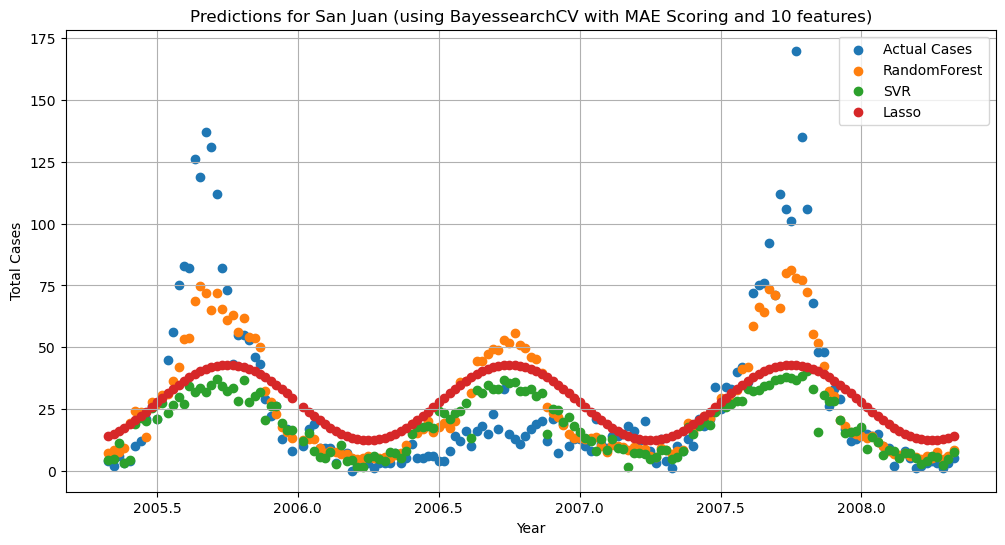

In [119]:
plot_X_test , plot_y_test = getPlotSet('sj',5)
matching_train_data = sj.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in ten_feature_MAE_SJ_model_list:
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for San Juan (using BayessearchCV with MAE Scoring and 10 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

In [120]:
ten_feature_MAE_SJ_model_list = []
ten_feature_MAE_SJ_model_list.append(get_10feature_model('sj', 'RandomForest', param_space_rf, scoring,split_position = 2))
ten_feature_MAE_SJ_model_list.append(get_10feature_model('sj', 'SVR', param_space_svr, scoring,split_position = 2 ))
ten_feature_MAE_SJ_model_list.append(get_10feature_model('sj', 'Lasso', param_space_lasso, scoring, split_position = 2 ))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

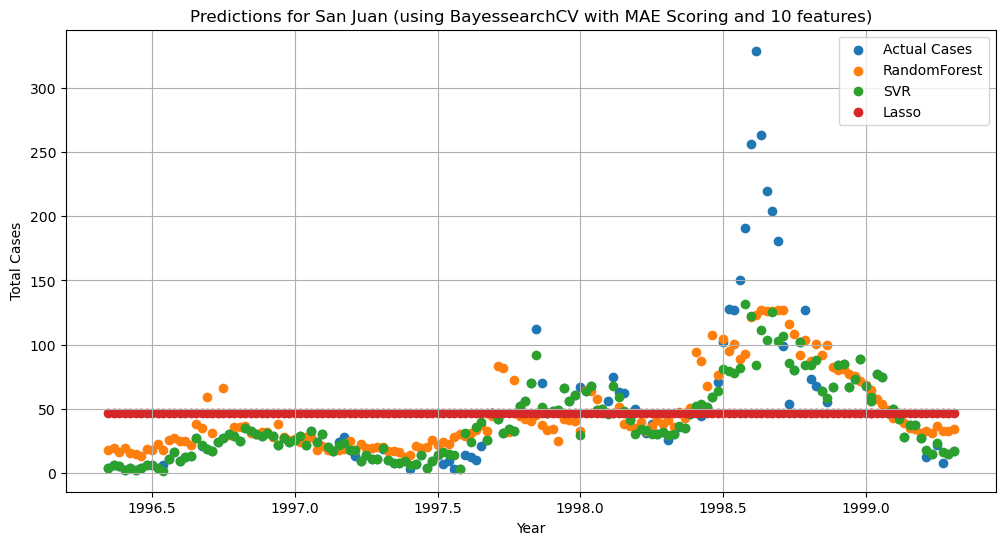

In [121]:
plot_X_test , plot_y_test = getPlotSet('sj',2)
matching_train_data = sj.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in ten_feature_MAE_SJ_model_list:
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for San Juan (using BayessearchCV with MAE Scoring and 10 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

In [122]:
ten_feature_MAE_IQ_model_list = []

param_space_rf = {
    'randomforest__n_estimators': Integer(50, 200),  
    'randomforest__max_depth': Integer(5, 20),  
    'randomforest__min_samples_split': Integer(2, 20),  
    'randomforest__min_samples_leaf': Integer(1, 10),  
    'randomforest__max_features': Real(0.1, 1.0)  
}
param_space_svr = {
    'svr__kernel': Categorical(['rbf', 'sigmoid']),  
    'svr__C': Real(10, 1e3, prior='log-uniform'),  
    'svr__gamma': Real(1e-6, 10, prior='log-uniform'),  
    'svr__coef0': Real(-2, 2, prior='uniform'), 
    'svr__epsilon': Real(0.1, 2.0, prior='uniform'),  
}
param_space_lasso = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring = 'neg_mean_absolute_error'
ten_feature_MAE_IQ_model_list = []
ten_feature_MAE_IQ_model_list.append(get_10feature_model('iq', 'RandomForest', param_space_rf, scoring,split_position = 5))
ten_feature_MAE_IQ_model_list.append(get_10feature_model('iq', 'SVR', param_space_svr, scoring,split_position = 5 ))
ten_feature_MAE_IQ_model_list.append(get_10feature_model('iq', 'Lasso', param_space_lasso, scoring, split_position = 5 ))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

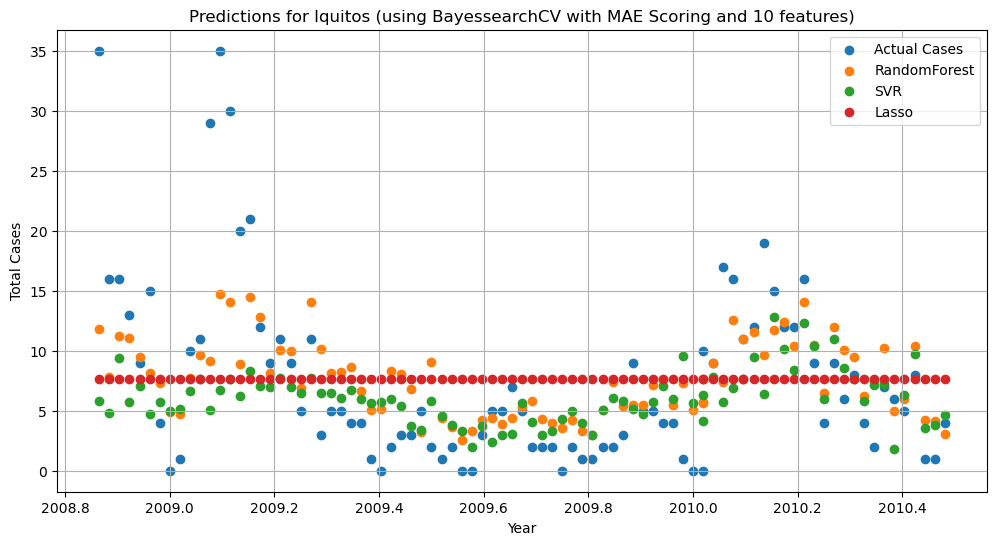

In [123]:
plot_X_test , plot_y_test = getPlotSet('iq',5)
matching_train_data = iq.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in ten_feature_MAE_IQ_model_list:
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for Iquitos (using BayessearchCV with MAE Scoring and 10 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

In [124]:
scoring = 'neg_mean_absolute_error'
ten_feature_MAE_IQ_model_list = []
ten_feature_MAE_IQ_model_list.append(get_10feature_model('iq', 'RandomForest', param_space_rf, scoring,split_position = 2))
ten_feature_MAE_IQ_model_list.append(get_10feature_model('iq', 'SVR', param_space_svr, scoring,split_position = 2 ))
ten_feature_MAE_IQ_model_list.append(get_10feature_model('iq', 'Lasso', param_space_lasso, scoring, split_position = 2 ))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

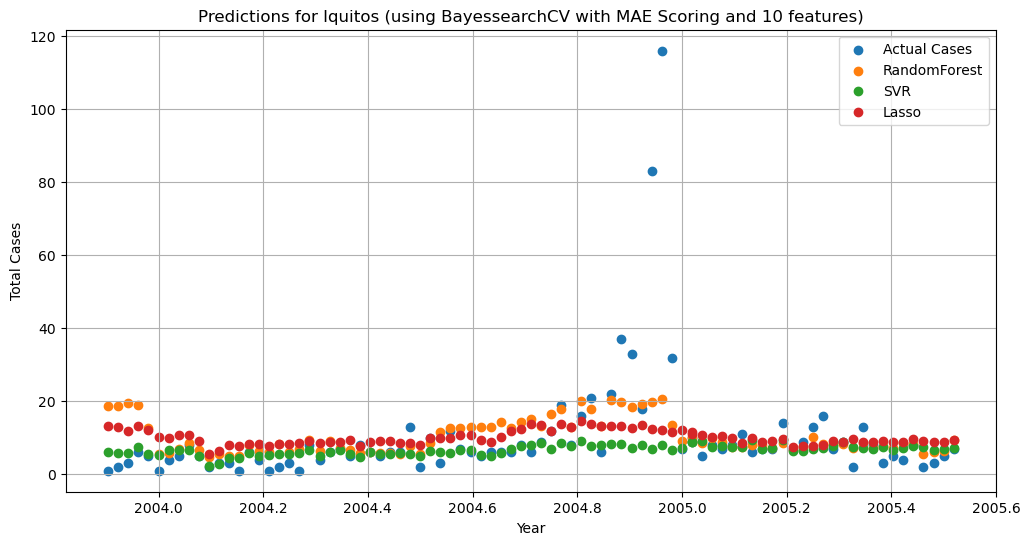

In [125]:
plot_X_test , plot_y_test = getPlotSet('iq',2)
matching_train_data = iq.loc[plot_X_test.index]
time_axis = matching_train_data['year'] + matching_train_data['weekofyear'] / 52.0
plt.figure(figsize=(12, 6))
plt.scatter(time_axis, plot_y_test.to_frame()['total_cases'], alpha=1, label='Actual Cases')

i=0
for model in ten_feature_MAE_IQ_model_list:
    predictions = model.predict(plot_X_test)
    if i==0:
        plt.scatter(time_axis,predictions, alpha=1, label='RandomForest')
    elif i==1:
        plt.scatter(time_axis, predictions, alpha=1, label='SVR')
    else:
        plt.scatter(time_axis, predictions, alpha=1, label='Lasso')
    i+=1
plt.title('Predictions for Iquitos (using BayessearchCV with MAE Scoring and 10 features)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

# Sundeep: SVM 10 Features

## Sundeep: Bayesian Hyperparameter Optimization SVM - SJ -  10 features - MAE Scoring

In [127]:
### Trial 1

In [128]:
from sklearn.svm import SVR

In [129]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'sigmoid', 'linear']),
#     'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
#     'svr__coef0': Real(-1.0, 1.0, prior='uniform'),  
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'SVR',param_space,scoring)

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [131]:
### Trial 2

In [132]:

# param_space = {
#     'svr__kernel': Categorical(['rbf', 'sigmoid', 'linear']),
#     'svr__C': Real(1e-2, 5000, prior='log-uniform'),
#     'svr__gamma': Real(1e-5, 1e2, prior='log-uniform'),
#     'svr__coef0': Real(-1.5, 1.5, prior='uniform'), 
#     'svr__epsilon': Real(0.005, 2.0, prior='uniform')
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'SVR' ,  param_space,scoring)

In [133]:
### Trial 3

In [134]:

# param_space = {
#     'svr__kernel': Categorical(['rbf', 'linear']),
#     'svr__C': Real(1e-2, 1e5, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 0.5, prior='log-uniform'),
#     'svr__epsilon': Real(0.5, 2.5, prior='uniform')
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'SVR' , param_space,scoring)

In [135]:
### Trial 4

In [136]:

# param_space = {
#     'svr__kernel': Categorical(['rbf']),
#     'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'SVR' , param_space,scoring)

**More exploration has lead to no real improvement in the performance metrics, therefore we stop optimizing the param space**

In [137]:
## Getting Performance metrics of SVM SJ -- MAE Scoring

In [138]:
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

param_space = {
    'svr__kernel': Categorical(['rbf']),
    'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
    'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
    'svr__epsilon': Real(0.01, 1.0, prior='uniform')
}
scoring='neg_mean_absolute_error'

aggregatePerformanceMetrics('sj', 'SVR' , param_space,scoring)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Sundeep: Bayesian Hyperparameter Optimization SVM - SJ -  10 features - R^2 Scoring

In [140]:
### Trial 1

In [141]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'sigmoid', 'linear']),
#     'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
#     'svr__coef0': Real(-1.0, 1.0, prior='uniform'),  
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')
# }
# scoring='r2'

# scoresAndBestParams('sj', 'SVR',param_space,scoring)

In [142]:
### Trial 2

In [143]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'linear']),
#     'svr__C': Real(1e-3, 80, prior='log-uniform'),
#     'svr__gamma': Real(1e-5, 50, prior='log-uniform'),
#     'svr__epsilon': Real(0.1, 1.2, prior='uniform')
# }
# scoring='r2'

# scoresAndBestParams('sj', 'SVR',param_space,scoring)

In [144]:
### Trial 3

In [145]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'linear']),
#     'svr__C': Real(1e-3, 80, prior='log-uniform'),
#     'svr__gamma': Real(1e-3, 50, prior='log-uniform'),
#     'svr__epsilon': Real(0.5, 1.5, prior='uniform')
# }
# scoring='r2'

# scoresAndBestParams('sj', 'SVR',param_space,scoring)

In [146]:
### Trial 4

In [147]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'linear']),
#     'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')
# }
# scoring='r2'

# scoresAndBestParams('sj', 'SVR',param_space,scoring)

In [148]:
### Trial 5

In [149]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'linear']),
#     'svr__C': Real(1e-3, 1e1, prior='log-uniform'),
#     'svr__gamma': Real(1e-5, 75, prior='log-uniform'),
#     'svr__epsilon': Real(0.001, 1.5, prior='uniform')
# }
# scoring='r2'
# scoresAndBestParams('sj', 'SVR',param_space,scoring)

**We get diminishing returns, therefore we stop optimizing the param space**

In [150]:
## Getting Performance metrics of SVM SJ -- R^2 Scoring

In [151]:
param_space = {
    'svr__kernel': Categorical(['rbf', 'linear']),
    'svr__C': Real(1e-3, 1e1, prior='log-uniform'),
    'svr__gamma': Real(1e-5, 75, prior='log-uniform'),
    'svr__epsilon': Real(0.001, 1.5, prior='uniform')
}
scoring='r2'

aggregatePerformanceMetrics('sj', 'SVR' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 1.5, 75.0, 'rbf'] before, using random point [1.8649276041451899, 1.1966096393974797, 1.585510800863063e-05, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 1.5, 75.0, 'rbf'] before, using random point [5.263518674479778, 0.5821538625117701, 0.0005433790484470514, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 1.5, 75.0, 'rbf'] before, using random point [2.8732836604521883, 0.91672201986067, 12.574519797722749, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 1.5, 75.0, 'rbf'] before, using random point [0.01375147945255711, 0.6824156840509329, 0.00010611208099295718, 'linear']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Sundeep: Bayesian Hyperparameter Optimization SVM - IQ  - MAE Scoring 10 features

In [153]:
### Trial 1

In [154]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'sigmoid', 'linear']),
#     'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
#     'svr__coef0': Real(-1.0, 1.0, prior='uniform'), 
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

In [155]:
### Trial 2

In [156]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'sigmoid']),  
#     'svr__C': Real(0.01, 100, prior='log-uniform'),  
#     'svr__gamma': Real(1e-3, 1, prior='log-uniform'),  
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform'), 
#     'svr__coef0': Real(-1.0, 1.0, prior='uniform') if 'sigmoid' in ['rbf', 'sigmoid'] else None
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

In [157]:
### Trial 3

In [158]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'sigmoid']),  
#     'svr__C': Real(10, 1e3, prior='log-uniform'), 
#     'svr__gamma': Real(1e-6, 10, prior='log-uniform'),  
#     'svr__coef0': Real(-2, 2, prior='uniform'), 
#     'svr__epsilon': Real(0.1, 2.0, prior='uniform'), 
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

In [159]:
### Trial 4

In [160]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'sigmoid']),  
#     'svr__C': Real(50, 2000, prior='log-uniform'),  
#     'svr__gamma': Real(1e-7, 20, prior='log-uniform'),  
#     'svr__coef0': Real(-2, 2, prior='uniform'),  
#     'svr__epsilon': Real(0.05, 2.5, prior='uniform'), 
# }

# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

**We get diminishing returns, so we stop optimizing the param space**

In [161]:
## Getting Performance metrics of SVM IQ -- Mean absolute error Scoring

In [195]:
param_space = {
    'svr__kernel': Categorical(['rbf', 'sigmoid']),  
    'svr__C': Real(10, 1e3, prior='log-uniform'), 
    'svr__gamma': Real(1e-6, 10, prior='log-uniform'),  
    'svr__coef0': Real(-2, 2, prior='uniform'),  
    'svr__epsilon': Real(0.1, 2.0, prior='uniform'), 
}
scoring='neg_mean_absolute_error'

aggregatePerformanceMetrics('iq', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Sundeep: Bayesian Hyperparameter Optimization SVM - IQ  - R^2 Scoring 10 features

In [197]:
### Trial 1

In [198]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'sigmoid', 'linear']),
#     'svr__C': Real(1e-3, 1e3, prior='log-uniform'),
#     'svr__gamma': Real(1e-4, 1e1, prior='log-uniform'),
#     'svr__coef0': Real(-1.0, 1.0, prior='uniform'),  # Relevant for sigmoid
#     'svr__epsilon': Real(0.01, 1.0, prior='uniform')
# }
# scoring='r2'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

In [199]:
### Trial 2

In [200]:
# param_space = {
#     'svr__kernel': Categorical(['rbf', 'linear']),  
#     'svr__C': Real(1, 100, prior='log-uniform'),  
#     'svr__gamma': Real(1e-4, 1, prior='log-uniform'),  
#     'svr__coef0': Real(-1, 1, prior='uniform'),  
#     'svr__epsilon': Real(0.05, 1.5, prior='uniform'), 
# }
# scoring='r2'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

In [201]:
### Trial 3

In [202]:
# param_space = {
#     'svr__kernel': ['rbf'],  
#     'svr__C': Real(1, 30, prior='log-uniform'), 
#     'svr__gamma': Real(0.0001, 2, prior='log-uniform'), 
#     'svr__epsilon': Real(0.05, 1.5, prior='uniform'), 
# }
# scoring='r2'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)

** Diminishing imporvements, therefore we move on to evaluate performance metrics with confidence**

In [203]:
## Getting Performance metrics of SVM IQ -- R^2 Scoring

In [204]:
### Trial 4

In [205]:
# param_space = {
#     'svr__kernel': Categorical(['rbf']), 
#     'svr__C': Real(1, 100, prior='log-uniform'),  
#     'svr__gamma': Real(1e-4, 1, prior='log-uniform'),  
#     'svr__epsilon': Real(0.05, 1.5, prior='uniform'),  
# }
# scoring='r2'

# scoresAndBestParams('iq', 'SVR',param_space,scoring)



In [206]:
### Diminishing improvements therefore we proceed to eveluating performance metrics

In [33]:

param_space = {
    'svr__kernel': Categorical(['rbf']), 
    'svr__C': Real(1, 100, prior='log-uniform'),  
    'svr__gamma': Real(1e-4, 1, prior='log-uniform'),  
    'svr__epsilon': Real(0.05, 1.5, prior='uniform'),  
}
scoring='r2'

aggregatePerformanceMetrics('iq', 'SVR',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, 0.05, 1.0, 'rbf'] before, using random point [1.5276907836243951, 0.8603443338900791, 0.00017279132886778667, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, 0.05, 1.0, 'rbf'] before, using random point [4.406543987218416, 1.4248854479026956, 0.07032345682390706, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, 0.05, 1.0, 'rbf'] before, using random point [19.31975494451392, 0.06047382617559353, 0.0032755498819570694, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, 0.05, 1.0, 'rbf'] before, using random point [55.33718962623627, 0.08170719479646019, 0.0012847139474345501, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 0.05, 1.0, 'rbf'] before, using random point [2.676239425508433, 1.0674223537026253, 0.0004860466767516217, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 0.05, 1.0, 'rbf'] before, using random point [1.2710584277439314, 1.197352981132041, 0.001990892456502848, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 0.05, 1.0, 'rbf'] before, using random point [14.215460340081988, 1.2946602492518855, 0.6439497044613514, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 0.05, 1.0, 'rbf'] before, using random point [64.45707487064519, 1.2519149046605353, 0.0174363762808455, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# Deniz: Random Forest 10 Features

## Deniz Bayesian Hyperparameter Optimization RF - SJ -  10 features - MAE Scoring

In [35]:
### Trial 1

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
# param_space = {
#     'randomforest__n_estimators': Integer(50, 200),  
#     'randomforest__max_depth': Integer(5, 20),  
#     'randomforest__min_samples_split': Integer(2, 20),  
#     'randomforest__min_samples_leaf': Integer(1, 10),  
#     'randomforest__max_features': Real(0.1, 1.0)  
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
### Trial 2

In [40]:

# param_space = {
#     'randomforest__n_estimators': Integer(50, 200),  
#     'randomforest__max_depth': Integer(5, 18),  
#     'randomforest__min_samples_split': Integer(2, 20),  
#     'randomforest__min_samples_leaf': Integer(6, 10),  
#     'randomforest__max_features': Real(0.1, 1.0)  
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'RandomForest' ,  param_space,scoring)

In [41]:
### Trial 3

In [42]:

# param_space = {
#     'randomforest__n_estimators': Integer(50, 200),  
#     'randomforest__max_depth': Integer(5, 18),  
#     'randomforest__min_samples_split': Integer(2, 20),  
#     'randomforest__min_samples_leaf': Integer(8, 10),  
#     'randomforest__max_features': Real(0.1, 1.0) 
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'RandomForest' , param_space,scoring)

In [43]:
### Trial 4

In [44]:

# param_space = {
#     'randomforest__n_estimators': Integer(80, 120),  
#     'randomforest__max_depth': Integer(15, 18), 
#     'randomforest__min_samples_split': Integer(2, 10),  
#     'randomforest__min_samples_leaf': Integer(8, 10),  
#     'randomforest__max_features': Real(0.4, 0.6)  
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'RandomForest' , param_space,scoring)

**More exploration has lead to no real improvement in the performance metrics, therefore we stop optimizing the param space**

In [45]:
## Getting Performance metrics of RF SJ -- MAE Scoring

In [46]:
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

param_space = {
    'randomforest__n_estimators': Integer(80, 120),  
    'randomforest__max_depth': Integer(15, 18),  
    'randomforest__min_samples_split': Integer(2, 10), 
    'randomforest__min_samples_leaf': Integer(8, 10),  
    'randomforest__max_features': Real(0.4, 0.6)  
}
scoring='neg_mean_absolute_error'

aggregatePerformanceMetrics('sj', 'RandomForest' , param_space,scoring)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [18, 0.4, 10, 10, 120] before, using random point [15, 0.510200706209672, 9, 4, 112]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [18, 0.4, 10, 10, 120] before, using random point [17, 0.47867114386787996, 9, 7, 112]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [18, 0.4, 10, 10, 120] before, using random point [17, 0.46700766262222415, 8, 4, 106]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [18, 0.4, 10, 2, 120] before, using random point [17, 0.550589547579559, 8, 5, 89]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [18, 0.4, 10, 2, 120] before, using random point [16, 0.5638475267030449, 10, 3, 112]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 0.4, 8, 2, 120] before, using random point [17, 0.4940893194739509, 10, 5, 97]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 0.4, 8, 2, 120] before, using random point [18, 0.567228410453392, 9, 3, 82]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [17, 0.4, 10, 2, 80] before, using random point [17, 0.45080631694694856, 9, 3, 91]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [17, 0.4, 10, 2, 80] before, using random point [16, 0.5749154770336081, 10, 9, 93]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [17, 0.4, 10, 2, 80] before, using random point [17, 0.5325808441359186, 9, 5, 98]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [17, 0.4, 10, 2, 80] before, using random point [17, 0.47518129994295505, 9, 7, 98]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [17, 0.4, 10, 2, 80] before, using random point [15, 0.5432164223092635, 10, 2, 89]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [17, 0.4, 10, 2, 80] before, using random point [15, 0.4589478639819457, 9, 3, 119]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 0.4, 10, 2, 120] before, using random point [16, 0.5526402409983081, 8, 10, 90]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 0.4, 10, 2, 120] before, using random point [17, 0.557892571823001, 9, 10, 101]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 0.4, 10, 2, 120] before, using random point [17, 0.5589016714207724, 9, 10, 82]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 0.4, 8, 9, 120] before, using random point [16, 0.5213378643137518, 10, 7, 81]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 0.4, 10, 2, 120] before, using random point [16, 0.5862366069698024, 10, 3, 105]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [18, 0.4, 10, 2, 120] before, using random point [18, 0.5613130943059255, 9, 5, 84]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [18, 0.4, 10, 2, 120] before, using random point [16, 0.5747232330922137, 9, 7, 87]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [18, 0.4, 10, 2, 120] before, using random point [16, 0.5000841603783909, 8, 9, 81]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [18, 0.4, 10, 2, 120] before, using random point [17, 0.5003727080851843, 9, 10, 93]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 0.4, 10, 2, 120] before, using random point [15, 0.42970989452777125, 10, 3, 86]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 0.4, 10, 2, 120] before, using random point [15, 0.46363307076448323, 9, 9, 96]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
MAE: Mean = 32.0606, 95% CI = [31.7113, 32.4100]
MSE: Mean = 2890.5907, 95% CI = [2865.2112, 2915.9702]
RMSE: Mean = 48.8030, 95% CI = [48.5114, 49.0947]
R^2: Mean = -2.3434, 95% CI = [-2.4244, -2.2624]


## Deniz: Bayesian Hyperparameter Optimization RF - SJ -  10 features - R^2 Scoring

In [48]:
### Trial 1

In [49]:
# param_space = {
#     'randomforest__n_estimators': Integer(80, 120),  
#     'randomforest__max_depth': Integer(15, 18),  
#     'randomforest__min_samples_split': Integer(2, 10), 
#     'randomforest__min_samples_leaf': Integer(8, 10),  
#     'randomforest__max_features': Real(0.4, 0.6)  
# }
# scoring='r2'

# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [50]:
### Trial 2

In [51]:
# param_space = {
#     'randomforest__n_estimators': Integer(100, 150),  
#     'randomforest__max_depth': Integer(15, 18),  
#     'randomforest__min_samples_split': Integer(2, 5),
#     'randomforest__min_samples_leaf': Integer(8, 10), 
#     'randomforest__max_features': Real(0.4, 0.6) 
# }
# scoring='r2'

# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [52]:
### Trial 3

In [53]:
# param_space = {
#     'randomforest__n_estimators': Integer(140, 160),
#     'randomforest__max_depth': Integer(15, 18),  
#     'randomforest__min_samples_split': Integer(2, 5),  
#     'randomforest__min_samples_leaf': Integer(8, 10), 
#     'randomforest__max_features': Real(0.4, 0.6) 
# }
# scoring='r2'

# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [54]:
### Trial 4

In [55]:
# param_space = {
#     'randomforest__n_estimators': Integer(150, 170),  
#     'randomforest__max_depth': Integer(15, 18),  
#     'randomforest__min_samples_split': Integer(4, 6),  
#     'randomforest__min_samples_leaf': Integer(8, 10), 
#     'randomforest__max_features': Real(0.4, 0.6)  
# }
# scoring='r2'

# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [56]:
### Trial 5

In [57]:
# param_space = {
#     'randomforest__n_estimators': Integer(160, 180),  
#     'randomforest__max_depth': Integer(14, 16), 
#     'randomforest__min_samples_split': Integer(3, 5), 
#     'randomforest__min_samples_leaf': Integer(8, 10), 
#     'randomforest__max_features': Real(0.45, 0.55) 
# }
# scoring='r2'
# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

In [58]:
# param_space = {
#     'randomforest__n_estimators': Integer(500, 1500),  
#     'randomforest__max_depth': Integer(30, 100), 
#     'randomforest__min_samples_split': Integer(2, 100),  
#     'randomforest__min_samples_leaf': Integer(1, 50), 
#     'randomforest__max_features': Real(0.01, 0.5)  
# }
# scoring='r2'
# scoresAndBestParams('sj', 'RandomForest',param_space,scoring)

**We get diminishing returns, therefore we stop optimizing the param space**

In [59]:
## Getting Performance metrics of RF SJ -- R^2 Scoring

In [60]:
param_space = {
    'randomforest__n_estimators': Integer(160, 180), 
    'randomforest__max_depth': Integer(14, 16),  
    'randomforest__min_samples_split': Integer(3, 5),  
    'randomforest__min_samples_leaf': Integer(8, 10),  
    'randomforest__max_features': Real(0.45, 0.55) 
}
scoring='r2'

aggregatePerformanceMetrics('sj', 'RandomForest' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [14, 0.45, 10, 4, 160] before, using random point [14, 0.5303535231733897, 9, 4, 164]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [14, 0.45, 10, 4, 180] before, using random point [14, 0.5379877666691004, 9, 4, 163]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [14, 0.45, 10, 4, 180] before, using random point [15, 0.5385667628936648, 8, 4, 162]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [14, 0.45, 10, 5, 160] before, using random point [14, 0.5425631762456495, 9, 4, 164]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [14, 0.45, 10, 5, 160] before, using random point [14, 0.4977100929413654, 10, 5, 168]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [14, 0.45, 10, 5, 160] before, using random point [15, 0.4678264819462581, 8, 3, 178]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [14, 0.45, 10, 5, 160] before, using random point [15, 0.4556355564873358, 8, 4, 167]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [16, 0.45, 10, 5, 160] before, using random point [16, 0.5411533342124608, 9, 4, 164]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [14, 0.45, 10, 3, 180] before, using random point [15, 0.4884217414778865, 10, 5, 167]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [16, 0.45, 10, 5, 180] before, using random point [16, 0.5133417735551666, 9, 4, 161]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [14, 0.45, 10, 3, 160] before, using random point [15, 0.4976512942082413, 9, 5, 174]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [14, 0.55, 8, 3, 160] before, using random point [15, 0.5387955417747882, 9, 5, 171]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 0.55, 10, 5, 180] before, using random point [16, 0.46024062912905433, 9, 4, 168]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [16, 0.45, 10, 5, 180] before, using random point [16, 0.459941139366767, 8, 3, 168]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [16, 0.45, 10, 5, 180] before, using random point [16, 0.4900022590173191, 9, 4, 176]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [16, 0.45, 10, 3, 180] before, using random point [15, 0.5140738573965179, 10, 4, 169]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Deniz: Bayesian Hyperparameter Optimization RF - IQ - 10 features - MAE Scoring

In [62]:
### Trial 1

In [63]:
# param_space = {
#     'randomforest__n_estimators': Integer(50, 200),  
#     'randomforest__max_depth': Integer(5, 20),  
#     'randomforest__min_samples_split': Integer(2, 20),  
#     'randomforest__min_samples_leaf': Integer(1, 10),  
#     'randomforest__max_features': Real(0.1, 1.0)  
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

In [64]:
### Trial 2

In [65]:
# param_space = {
#     'randomforest__n_estimators': Integer(50, 100), 
#     'randomforest__max_depth': Integer(15, 20),  
#     'randomforest__min_samples_split': Integer(10, 20),  
#     'randomforest__min_samples_leaf': Integer(5, 10),  
#     'randomforest__max_features': Real(0.8, 1.0)  
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

In [66]:
### Trial 3

In [67]:
# param_space = {
#     'randomforest__n_estimators': Integer(40, 70),  
#     'randomforest__max_depth': Integer(14, 18),  
#     'randomforest__min_samples_split': Integer(10, 20),  
#     'randomforest__min_samples_leaf': Integer(5, 10),  
#     'randomforest__max_features': Real(0.8, 1.0)  
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

**We get diminishing returns, so we stop optimizing the param space**

In [68]:
## Getting Performance metrics of RF IQ -- Mean absolute error Scoring

In [69]:
param_space = {
    'randomforest__n_estimators': Integer(50, 200),  
    'randomforest__max_depth': Integer(5, 20),  
    'randomforest__min_samples_split': Integer(2, 20),  
    'randomforest__min_samples_leaf': Integer(1, 10),  
    'randomforest__max_features': Real(0.1, 1.0) 
}
scoring='neg_mean_absolute_error'

aggregatePerformanceMetrics('iq', 'RandomForest',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 1, 20, 200] before, using random point [17, 0.10806446736405484, 4, 15, 104]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 1, 20, 200] before, using random point [8, 0.45241776173397175, 2, 4, 67]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 1, 20, 200] before, using random point [8, 0.16148587941023157, 9, 9, 104]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 1, 20, 200] before, using random point [19, 0.4098873794808944, 5, 12, 167]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 1, 20, 200] before, using random point [10, 0.26461082374056116, 2, 10, 148]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 1, 20, 200] before, using random point [5, 0.9850671693063474, 9, 4, 183]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 1, 20, 200] before, using random point [15, 0.7937505480306233, 4, 6, 115]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 1, 20, 200] before, using random point [8, 0.10381910881192652, 8, 4, 55]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 1, 20, 200] before, using random point [12, 0.6331538711995641, 5, 7, 124]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 1.0, 3, 20, 200] before, using random point [13, 0.5565256828671066, 5, 12, 62]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 1.0, 4, 2, 50] before, using random point [15, 0.6187668236962546, 6, 11, 103]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 1.0, 4, 2, 50] before, using random point [13, 0.51129602115379, 7, 15, 60]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 1.0, 4, 2, 50] before, using random point [14, 0.2987263312264304, 7, 10, 178]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 10, 2, 200] before, using random point [18, 0.10875327944998775, 7, 11, 72]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 10, 2, 200] before, using random point [9, 0.8191918614465751, 7, 17, 145]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 1, 2, 200] before, using random point [5, 0.9929054105602633, 10, 14, 168]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 0.1, 1, 20, 200] before, using random point [16, 0.14804843503163895, 6, 3, 125]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 1.0, 5, 2, 50] before, using random point [14, 0.14824292786003612, 2, 7, 127]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Deniz: Bayesian Hyperparameter Optimization RF - IQ  - R^2 Scoring

In [71]:
### Trial 1

In [72]:
# param_space = {
#     'randomforest__n_estimators': Integer(40, 70), 
#     'randomforest__max_depth': Integer(14, 18),  
#     'randomforest__min_samples_split': Integer(10, 20),  
#     'randomforest__min_samples_leaf': Integer(5, 10),  
#     'randomforest__max_features': Real(0.8, 1.0)  
# }
# scoring='r2'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

In [73]:
### Trial 2

In [74]:
# param_space = {
#     'randomforest__n_estimators': Integer(40, 70), 
#     'randomforest__max_depth': Integer(16, 18),  
#     'randomforest__min_samples_split': Integer(10, 15),  
#     'randomforest__min_samples_leaf': Integer(5, 9),  
#     'randomforest__max_features': Real(0.8, 1.0)  
# }
# scoring='r2'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

In [75]:
### Trial 3

In [76]:
# param_space = {
#     'randomforest__n_estimators': Integer(60, 80),  
#     'randomforest__max_depth': Integer(15, 17),  
#     'randomforest__min_samples_split': Integer(10, 15), 
#     'randomforest__min_samples_leaf': Integer(5, 9), 
#     'randomforest__max_features': Real(0.8, 0.95)  
# }
# scoring='r2'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

In [77]:
### Trial 4

In [78]:
# param_space = {
#     'randomforest__n_estimators': Integer(60, 80),  
#     'randomforest__max_depth': Integer(14, 16),  
#     'randomforest__min_samples_split': Integer(13, 16),  
#     'randomforest__min_samples_leaf': Integer(7, 9),  
#     'randomforest__max_features': Real(0.8, 0.9)  
# }
# scoring='r2'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

In [79]:
### Trial 5

In [80]:
# param_space = {
#     'randomforest__n_estimators': Integer(200, 800),  
#     'randomforest__max_depth': Integer(10, 30),  
#     'randomforest__min_samples_split': Integer(2, 20),  
#     'randomforest__min_samples_leaf': Integer(1, 15),  
#     'randomforest__max_features': Real(0.3, 1.0)  
# }
# scoring='r2'

# scoresAndBestParams('iq', 'RandomForest',param_space,scoring)

** Diminishing imporvements, therefore we move on to evaluate performance metrics with confidence**

In [81]:
## Getting Performance metrics of RF IQ -- R^2 Scoring

In [82]:
### Diminishing improvements therefore we proceed to eveluating performance metrics

In [83]:
param_space = {
    'randomforest__n_estimators': Integer(200, 800),  
    'randomforest__max_depth': Integer(10, 30),  
    'randomforest__min_samples_split': Integer(2, 20),  
    'randomforest__min_samples_leaf': Integer(1, 15),  
    'randomforest__max_features': Real(0.3, 1.0) 
}
scoring='r2'

aggregatePerformanceMetrics('iq', 'RandomForest',param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 200] before, using random point [28, 0.8968461228167222, 15, 4, 722]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 200] before, using random point [16, 0.32995974126558064, 7, 8, 512]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 800] before, using random point [20, 0.7342376154650927, 9, 18, 403]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 800] before, using random point [24, 0.33369133875295076, 5, 5, 787]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 800] before, using random point [19, 0.773238577393758, 10, 6, 504]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 800] before, using random point [25, 0.6709929979384552, 1, 5, 270]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 3, 20, 800] before, using random point [30, 0.5515559543277471, 2, 12, 376]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 3, 20, 800] before, using random point [23, 0.6524967209869372, 4, 13, 589]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 800] before, using random point [14, 0.5623819950598614, 10, 2, 429]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 800] before, using random point [11, 0.8892215053665684, 4, 8, 728]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 800] before, using random point [28, 0.5332128540169543, 3, 13, 265]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 2, 800] before, using random point [22, 0.5689521903452051, 12, 17, 417]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 2, 800] before, using random point [23, 0.6353658029724533, 7, 3, 691]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 2, 800] before, using random point [14, 0.4043316332413276, 13, 13, 596]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 2, 800] before, using random point [27, 0.3219304803204336, 9, 10, 248]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 2, 800] before, using random point [14, 0.6312668999861215, 7, 19, 220]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [22, 0.4596155218552742, 12, 3, 551]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [22, 0.982422160192499, 13, 8, 578]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [28, 0.42629346573040167, 13, 5, 692]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [23, 0.841929494067079, 5, 12, 516]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [29, 0.4355549473022989, 11, 15, 794]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [13, 0.8711956251527357, 14, 19, 355]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [29, 0.37941527546111947, 4, 10, 661]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 200] before, using random point [14, 0.7792023585118479, 12, 6, 662]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 200] before, using random point [13, 0.657084890629094, 11, 12, 310]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 6, 20, 800] before, using random point [26, 0.5522775985728696, 14, 2, 459]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 800] before, using random point [18, 0.4473132530618169, 2, 18, 218]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 15, 20, 200] before, using random point [25, 0.6912169074978911, 9, 6, 408]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 1, 20, 800] before, using random point [29, 0.3189260816863619, 10, 14, 366]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 2, 800] before, using random point [16, 0.7235565878631589, 13, 12, 655]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [18, 0.8361430544522386, 12, 3, 351]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.3, 15, 20, 800] before, using random point [24, 0.3524026087059847, 7, 9, 263]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 0.3, 1, 20, 800] before, using random point [24, 0.6878861953432136, 7, 7, 360]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
MAE: Mean = 6.7698, 95% CI = [6.7078, 6.8318]
MSE: Mean = 131.3575, 95% CI = [130.6030, 132.1121]
RMSE: Mean = 10.9511, 95% CI = [10.9119, 10.9903]
R^2: Mean = -0.0736, 95% CI = [-0.0844, -0.0629]


# Lasso 10 Features

## Hassan: SJ - MAE 10 features Lasso

In [85]:
### Trial 1 checking for convergence 

In [86]:
from sklearn.linear_model import Lasso

In [87]:
# param_space = {
#     'lasso__alpha': Real(1e-6, 1e+6, prior='log-uniform')

# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'Lasso',param_space,scoring)

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [89]:
### Trial 2 checking for convergence

In [90]:


# param_space = {
#     'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
      
# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('sj', 'Lasso' ,  param_space,scoring)

In [91]:
### Calculating Performance Metrics for SJ      -VE MAE (AFTER CONVERGENCE)

In [92]:


param_space = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring='neg_mean_absolute_error'

aggregatePerformanceMetrics('sj', 'Lasso' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100000.0] before, using random point [64760.84945893709]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Hassan: SJ - R^2 10 features Lasso

In [94]:
### TRIAL  1 for convergene - r^2

In [95]:

# param_space = {
#     'lasso__alpha': Real(1e-6, 1e+6, prior='log-uniform')
# }
# scoring='r2'

# scoresAndBestParams('sj', 'Lasso' , param_space,scoring)

In [96]:
### Trial 2 for convergence - r^2

In [97]:

# param_space = {
#     'lasso__alpha': Real(1, 1e5, prior='log-uniform')
# }
# scoring='r2'

# scoresAndBestParams('sj', 'Lasso' , param_space,scoring)

In [98]:
## Calculating Performance Metrcis for SJ - r^2

In [99]:

param_space = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring='r2'

aggregatePerformanceMetrics('sj', 'Lasso' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Hassan: IQ MAE 10 features Lasso

In [101]:
### TRIAL 1

In [102]:
# param_space = {
#     'lasso__alpha': Real(1e-6, 1e+6, prior='log-uniform')

# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'Lasso',param_space,scoring)

In [103]:
### TRIAL 2 

In [104]:
# param_space = {
#     'lasso__alpha': Real(1, 1e+5, prior='log-uniform')

# }
# scoring='neg_mean_absolute_error'

# scoresAndBestParams('iq', 'Lasso',param_space,scoring)

In [105]:
## Calculating Performance Metrcis for Iq - MAE


In [106]:

param_space = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring='neg_mean_absolute_error'

aggregatePerformanceMetrics('iq', 'Lasso' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Hassan: Iq R^2  10 features Lasso

In [108]:
### Trial 1

In [109]:

# param_space = {
#     'lasso__alpha': Real(1e-6, 1e+6, prior='log-uniform')
# }
# scoring='r2'

# scoresAndBestParams('iq', 'Lasso' , param_space,scoring)

In [110]:
### Trial 2

In [111]:

# param_space = {
#     'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
# }
# scoring='r2'

# scoresAndBestParams('iq', 'Lasso' , param_space,scoring)

In [112]:
### Calculating Performance Metrcis for Iq - R^2

In [113]:

param_space = {
       'lasso__alpha': Real(1, 1e+5, prior='log-uniform')
}
scoring='r2'

aggregatePerformanceMetrics('iq', 'Lasso' , param_space,scoring)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100000.0] before, using random point [298.8404620854806]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100000.0] before, using random point [2845.5329906572506]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100000.0] before, using random point [637.8068267361224]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100000.0] before, using random point [6.125407173870142]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi